# Exploratory Data Analysis - Final Traffic Accident Dataset

This notebook performs comprehensive exploratory data analysis on the final traffic accident dataset (`data/final/data.csv`).

In [144]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Data

In [145]:
# Load the dataset
df = pd.read_csv('../../../data/final/data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (219, 54)
Number of rows: 219
Number of columns: 54


In [146]:
# Display first few rows
df.head(10)

,id,date_published,accident_datetime,accident_severity,total_injured,city,street,accident_time_category,driver_under_18,driver_18_to_24,...,is_school_day_mt,street_type,region,temperature_max,temperature_min,temperature_mean,precipitation_sum,windspeed_max,is_raining,traffic_level
0,article_3834.0,30/12/2024,2006-12-17 00:00:00,grievious,1,qormi,triq il-mithna,night,False,False,...,False,secondary,Central,18.0,16.5,17.4,4.9,35.4,True,LOW
1,article_2101.0,01/04/2025,2017-08-20 15:25:00,fatal,3,mgarr,triq sir temi zammit,afternoon,False,False,...,False,secondary,Northern,30.0,25.0,27.1,0.0,23.4,False,MODERATE
2,article_353524.0,23/07/2025,2018-03-13 00:00:00,fatal,1,paola,triq wied bladun,night,False,False,...,True,residential,Southern Harbour,16.8,13.2,14.9,0.0,31.3,False,LOW
3,article_1352.0,09/05/2025,2020-05-02 08:00:00,serious,1,siggiewi,triq ghar lapsi,early_morning,False,False,...,False,secondary,Central,20.3,16.6,18.5,0.0,35.1,False,LOW
4,article_490632.0,17/08/2025,2022-02-01 00:00:00,fatal,1,marsa,aldo moro road,night,False,False,...,True,trunk,Southern Harbour,14.3,10.4,12.4,0.4,53.4,True,LOW
5,article_3861.0,29/12/2024,2022-09-24 00:00:00,fatal,1,swieqi,triq il-madliena,night,False,True,...,False,primary,Northern,25.0,20.7,22.9,0.0,20.7,False,LOW
6,article_167578.0,15/07/2025,2023-10-01 00:00:00,grievious,1,san pawl il bahar,triq dicembru tlettax,night,False,False,...,False,trunk,Northern,26.4,20.9,23.8,0.9,9.7,True,LOW
7,article_3558.0,16/01/2025,2023-10-22 22:00:00,fatal,1,st julian,regional road,late_evening,False,False,...,False,trunk,Northern,26.5,21.6,23.9,0.0,21.4,False,LOW
8,article_495320.0,30/09/2025,2024-03-19 00:00:00,not injured,0,birkirkara,naxxar road,night,False,False,...,False,primary,Central,19.8,12.1,16.0,0.0,20.9,False,LOW
9,article_495942.0,06/10/2025,2024-09-23 00:00:00,not injured,0,san pawl il bahar,triq censu tabone,night,False,False,...,True,residential,Northern,26.5,20.8,23.5,7.3,22.7,True,LOW


In [147]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          219 non-null    object 
 1   date_published              219 non-null    object 
 2   accident_datetime           219 non-null    object 
 3   accident_severity           219 non-null    object 
 4   total_injured               219 non-null    int64  
 5   city                        219 non-null    object 
 6   street                      219 non-null    object 
 7   accident_time_category      219 non-null    object 
 8   driver_under_18             219 non-null    bool   
 9   driver_18_to_24             219 non-null    bool   
 10  driver_25_to_49             219 non-null    bool   
 11  driver_50_to_64             219 non-null    bool   
 12  driver_65_plus              219 non-null    bool   
 13  driver_age_unknown          219 non

In [148]:
# Display column names for better understanding
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

Column names:
  1. id
  2. date_published
  3. accident_datetime
  4. accident_severity
  5. total_injured
  6. city
  7. street
  8. accident_time_category
  9. driver_under_18
 10. driver_18_to_24
 11. driver_25_to_49
 12. driver_50_to_64
 13. driver_65_plus
 14. driver_age_unknown
 15. num_drivers_under_18
 16. num_drivers_18_to_24
 17. num_drivers_25_to_49
 18. num_drivers_50_to_64
 19. num_drivers_65_plus
 20. num_drivers_age_unknown
 21. driver_male
 22. driver_female
 23. driver_gender_unknown
 24. num_drivers_male
 25. num_drivers_female
 26. num_drivers_gender_unknown
 27. num_drivers_total
 28. vehicle_unknown
 29. vehicle_pedestrian
 30. vehicle_bicycle
 31. vehicle_motorbike
 32. vehicle_car
 33. vehicle_van
 34. vehicle_bus
 35. num_vehicle_unknown
 36. num_vehicle_pedestrian
 37. num_vehicle_bicycle
 38. num_vehicle_motorbike
 39. num_vehicle_car
 40. num_vehicle_van
 41. num_vehicle_bus
 42. is_weekend
 43. is_public_holiday_mt
 44. is_school_holiday_mt
 45. is_school_da

## 2. Missing Values Analysis

In [149]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(f"\nColumns with missing values: {len(missing_df)}")
print("\nTop 20 columns with most missing values:")
missing_df.head(20)


Columns with missing values: 0

Top 20 columns with most missing values:


,Column,Missing_Count,Missing_Percent


In [150]:
# Visualize missing values
plt.figure(figsize=(14, 8))
if len(missing_df) > 0:
    top_missing = missing_df.head(20)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percent'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


<Figure size 1400x800 with 0 Axes>

## 3. Basic Statistical Summary

In [151]:
# Statistical summary of numerical columns
df.describe()

,total_injured,num_drivers_under_18,num_drivers_18_to_24,num_drivers_25_to_49,num_drivers_50_to_64,num_drivers_65_plus,num_drivers_age_unknown,num_drivers_male,num_drivers_female,num_drivers_gender_unknown,...,num_vehicle_bicycle,num_vehicle_motorbike,num_vehicle_car,num_vehicle_van,num_vehicle_bus,temperature_max,temperature_min,temperature_mean,precipitation_sum,windspeed_max
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.333333,0.036530,0.205479,0.744292,0.260274,0.205479,0.214612,1.114155,0.310502,0.242009,...,0.031963,0.497717,0.858447,0.141553,0.050228,23.938813,18.605936,21.123744,1.112785,20.718721
std,1.046327,0.188034,0.448000,0.759286,0.498458,0.458125,0.501892,0.717239,0.519729,0.516576,...,0.176306,0.561571,0.644710,0.374728,0.218916,6.239876,4.989651,5.445155,5.172929,9.788767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.400000,9.000000,11.800000,0.000000,6.100000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,13.900000,16.000000,0.000000,12.900000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000,18.600000,21.200000,0.000000,19.400000
75%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,29.500000,23.250000,26.100000,0.400000,26.350000
max,9.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,1.000000,3.000000,3.000000,2.000000,1.000000,37.500000,26.400000,31.100000,66.500000,53.400000


In [152]:
# Statistical summary of categorical columns
df.describe(include='object')

,id,date_published,accident_datetime,accident_severity,city,street,accident_time_category,street_type,region,traffic_level
count,219,219,219,219,219,219,219,219,219,219
unique,219,142,211,5,56,137,6,6,5,3
top,article_3834.0,07/08/2025,2025-08-10 05:20:00,grievious,naxxar,regional road,afternoon,secondary,Northern,LOW
freq,1,5,2,87,18,9,68,68,62,182


## 4. Accident Severity Analysis

In [153]:
# Accident severity distribution
severity_counts = df['accident_severity'].value_counts()
print("Accident Severity Distribution:")
print(severity_counts)
print(f"\nTotal accidents: {severity_counts.sum()}")

Accident Severity Distribution:
accident_severity
grievious      87
serious        75
fatal          33
not injured    17
slight          7
Name: count, dtype: int64

Total accidents: 219


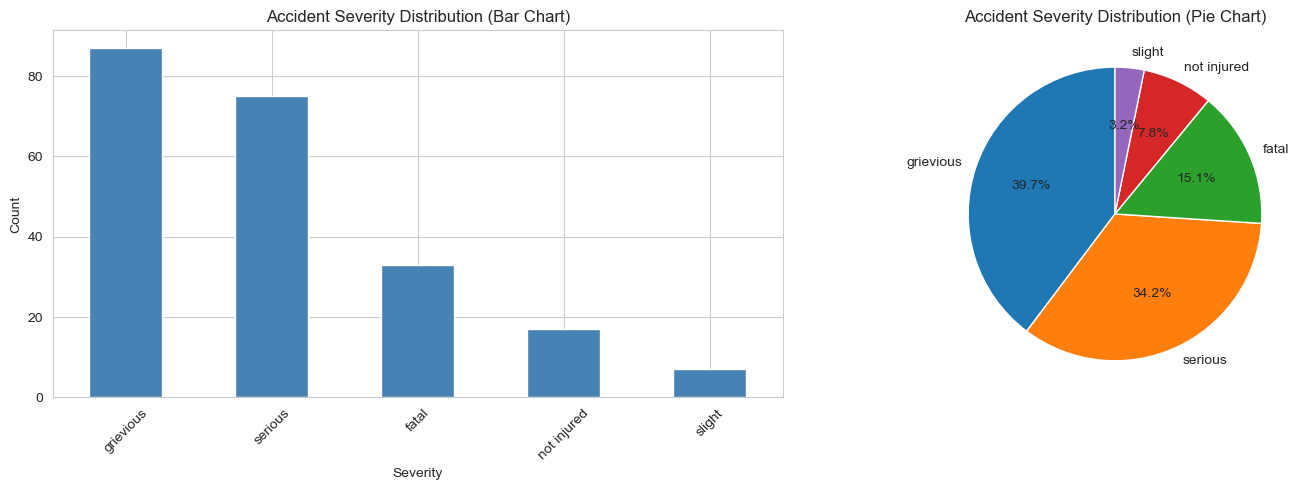

In [154]:
# Visualize accident severity
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
severity_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Accident Severity Distribution (Bar Chart)')
axes[0].set_xlabel('Severity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Accident Severity Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

## 5. Temporal Analysis

In [155]:
# Convert date column to datetime
df['accident_datetime'] = pd.to_datetime(df['accident_datetime'])
df['accident_year'] = df['accident_datetime'].dt.year
df['accident_month'] = df['accident_datetime'].dt.month
df['accident_day_of_week'] = df['accident_datetime'].dt.dayofweek
df['accident_hour'] = df['accident_datetime'].dt.hour

print("Temporal features extracted successfully!")

Temporal features extracted successfully!


Accidents by Year:
accident_year
2006      1
2017      1
2018      1
2020      1
2022      2
2023      2
2024     23
2025    188
Name: count, dtype: int64


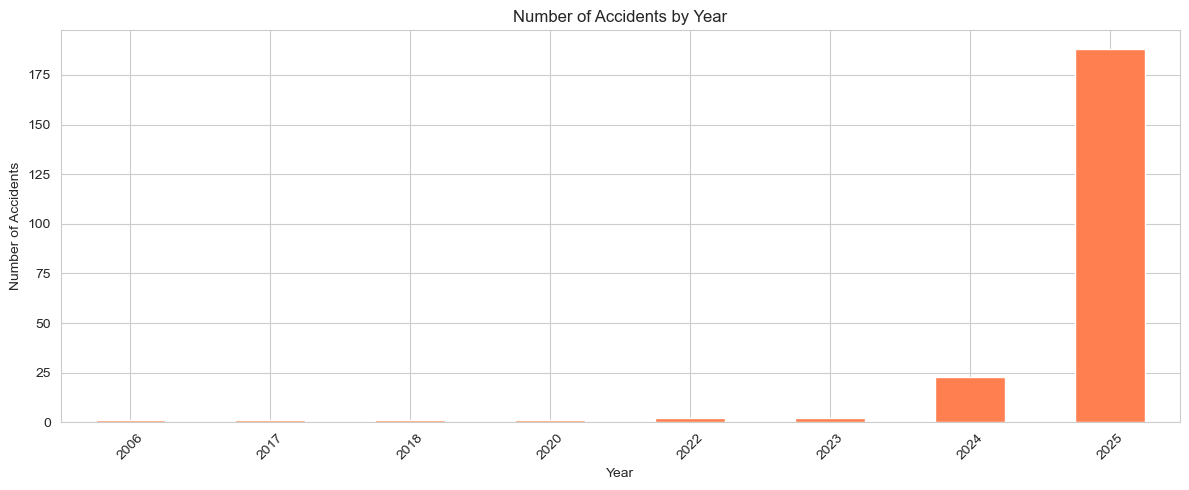

In [156]:
# Accidents by year
accidents_by_year = df['accident_year'].value_counts().sort_index()
print("Accidents by Year:")
print(accidents_by_year)

plt.figure(figsize=(12, 5))
accidents_by_year.plot(kind='bar', color='coral')
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
# Exclude outlier accidents before 2024
df = df[df['accident_year'] >= 2024]

print(f"Dataset after excluding accidents before 2024:")
print(f"Remaining accidents: {len(df)}")
print(f"Date range: {df['accident_datetime'].min()} to {df['accident_datetime'].max()}")
print(f"\nAccidents by year after filtering:")
print(df['accident_year'].value_counts().sort_index())

Dataset after excluding accidents before 2024:
Remaining accidents: 211
Date range: 2024-03-19 00:00:00 to 2025-10-10 09:00:00

Accidents by year after filtering:
accident_year
2024     23
2025    188
Name: count, dtype: int64


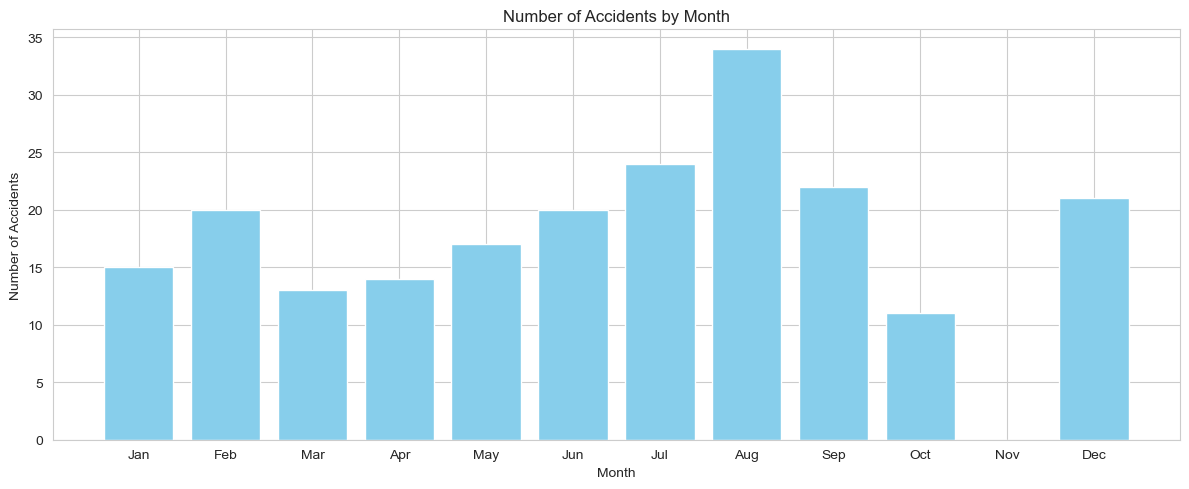

In [158]:
# Accidents by month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
accidents_by_month = df['accident_month'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(range(1, 13), [accidents_by_month.get(i, 0) for i in range(1, 13)], color='skyblue')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

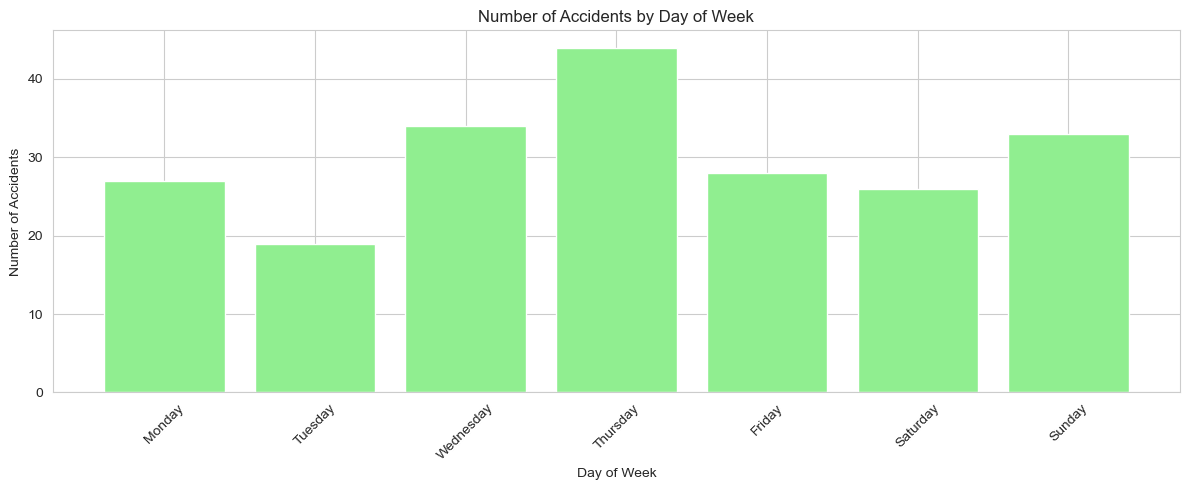

In [159]:
# Accidents by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day = df['accident_day_of_week'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.bar(range(7), [accidents_by_day.get(i, 0) for i in range(7)], color='lightgreen')
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), day_names, rotation=45)
plt.tight_layout()
plt.show()

Accidents by Time Category:
accident_time_category
afternoon        67
morning          45
night            38
early_morning    25
evening          23
late_evening     13
Name: count, dtype: int64


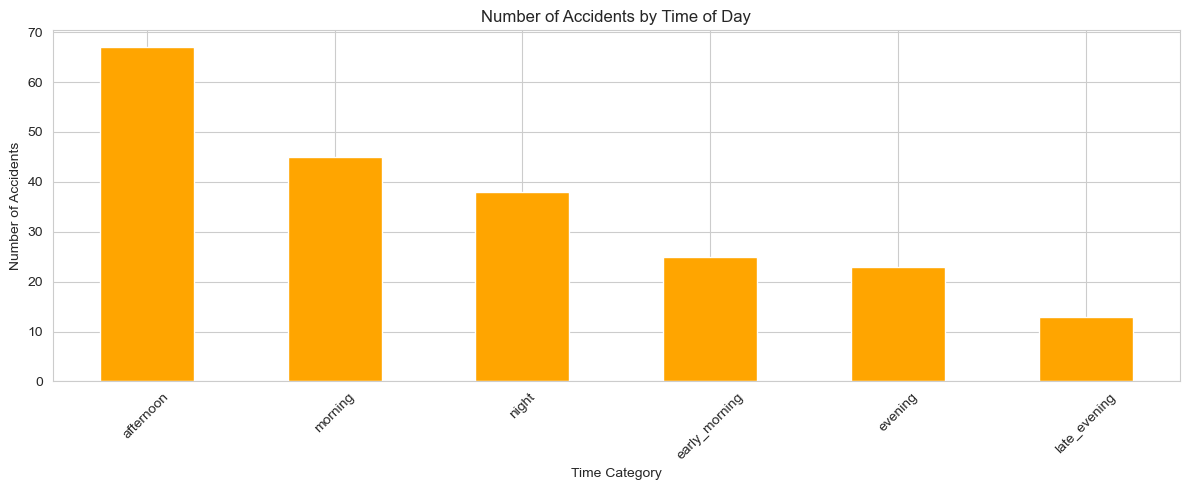

In [160]:
# Accidents by time of day category
time_category_counts = df['accident_time_category'].value_counts()
print("Accidents by Time Category:")
print(time_category_counts)

plt.figure(figsize=(12, 5))
time_category_counts.plot(kind='bar', color='orange')
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Location Analysis

Top 15 Cities with Most Accidents:
city
naxxar               18
san pawl il bahar    10
marsa                10
paola                 9
birkirkara            7
sliema                7
zebbug                7
zejtun                7
msida                 7
floriana              6
luqa                  5
gzira                 5
siggiewi              5
mellieha              5
attard                5
Name: count, dtype: int64


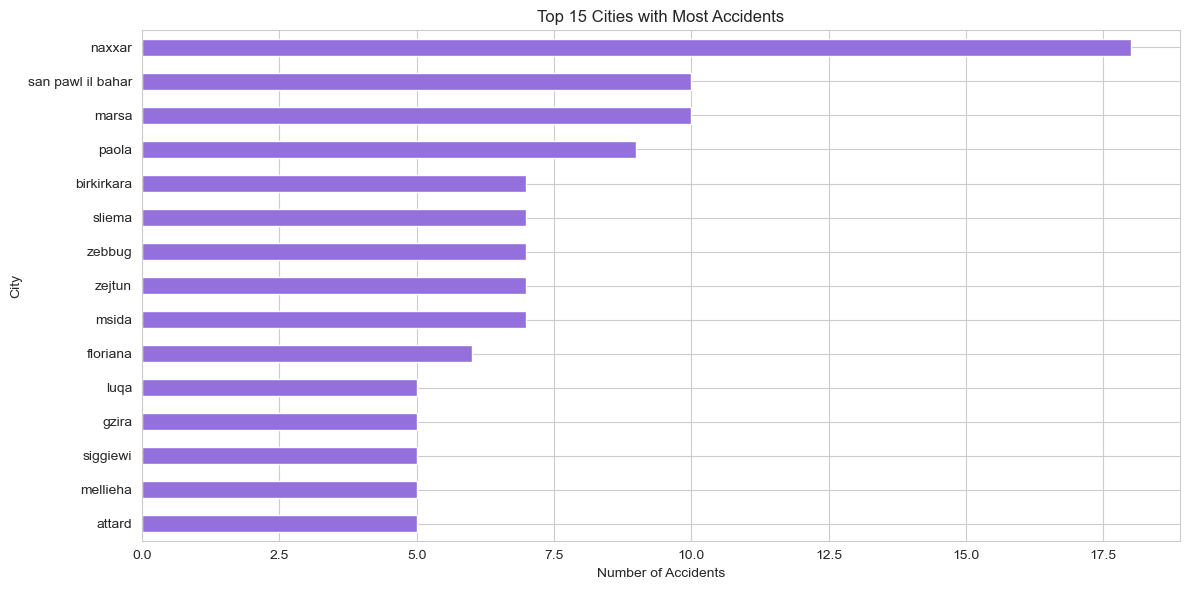

In [161]:
# Top cities with most accidents
top_cities = df['city'].value_counts().head(15)
print("Top 15 Cities with Most Accidents:")
print(top_cities)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh', color='mediumpurple')
plt.title('Top 15 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Accidents by Region:
region
Central             58
Northern            58
Southern Harbour    46
South Eastern       35
Gozo                14
Name: count, dtype: int64


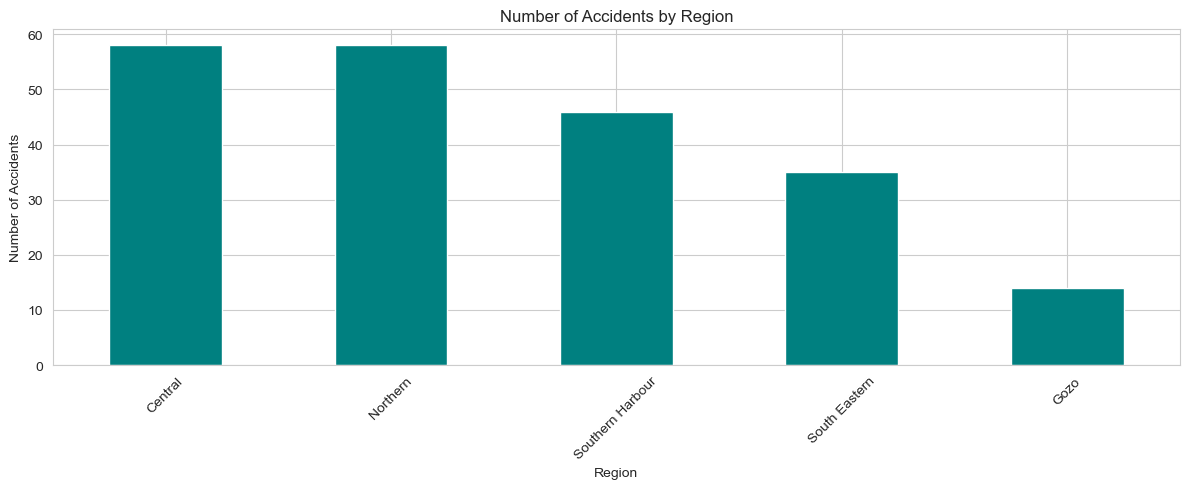

In [162]:
# Region distribution
region_counts = df['region'].value_counts()
print("Accidents by Region:")
print(region_counts)

plt.figure(figsize=(12, 5))
region_counts.plot(kind='bar', color='teal')
plt.title('Number of Accidents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Accidents by Street Type:
street_type
secondary      65
trunk          52
residential    44
primary        33
other           9
tertiary        8
Name: count, dtype: int64


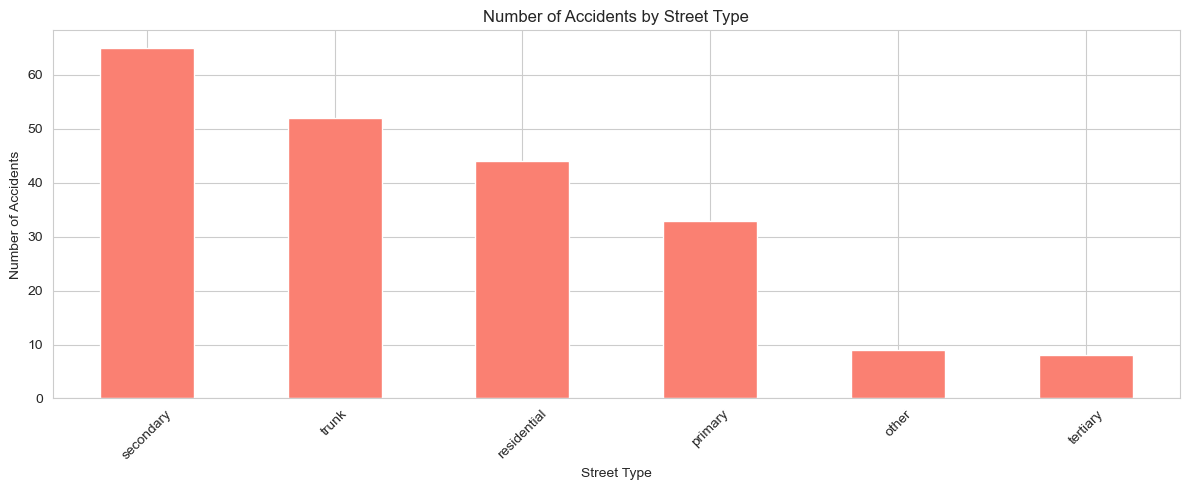

In [163]:
# Street type distribution
street_type_counts = df['street_type'].value_counts()
print("Accidents by Street Type:")
print(street_type_counts)

plt.figure(figsize=(12, 5))
street_type_counts.plot(kind='bar', color='salmon')
plt.title('Number of Accidents by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Driver Demographics Analysis

Total drivers involved in accidents: 350

Driver Gender Distribution:
Male drivers: 232 (66.3%)
Female drivers: 67 (19.1%)
Unknown gender: 51 (14.6%)


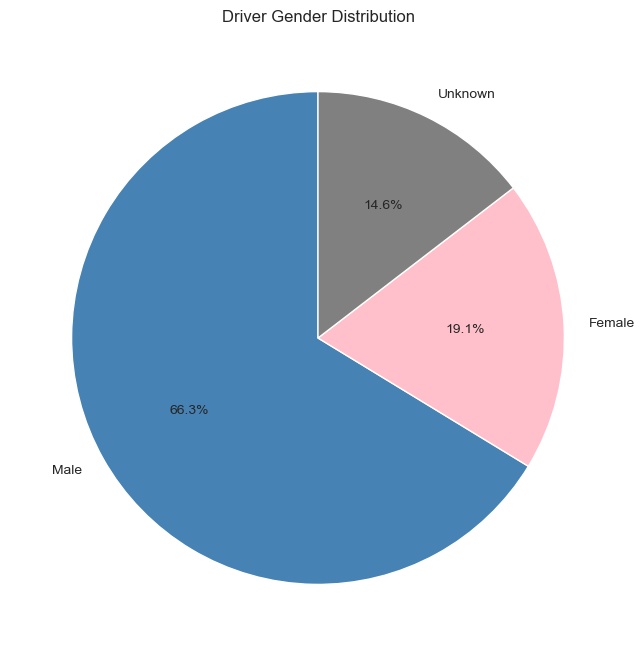

In [164]:
# Total number of drivers involved
total_drivers = df['num_drivers_total'].sum()
print(f"Total drivers involved in accidents: {total_drivers}")

# Driver gender distribution
male_drivers = df['num_drivers_male'].sum()
female_drivers = df['num_drivers_female'].sum()
unknown_gender = df['num_drivers_gender_unknown'].sum()

print(f"\nDriver Gender Distribution:")
print(f"Male drivers: {male_drivers} ({male_drivers/total_drivers*100:.1f}%)")
print(f"Female drivers: {female_drivers} ({female_drivers/total_drivers*100:.1f}%)")
print(f"Unknown gender: {unknown_gender} ({unknown_gender/total_drivers*100:.1f}%)")

# Visualize
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie([male_drivers, female_drivers, unknown_gender], 
       labels=['Male', 'Female', 'Unknown'], 
       autopct='%1.1f%%', 
       startangle=90,
       colors=['steelblue', 'pink', 'gray'])
ax.set_title('Driver Gender Distribution')
plt.show()

### 7.1 Driver Age Analysis

Driver Age Distribution:
Under 18: 8 (2.3%)
18-24: 44 (12.6%)
25-49: 156 (44.6%)
50-64: 57 (16.3%)
65+: 44 (12.6%)
Unknown: 41 (11.7%)


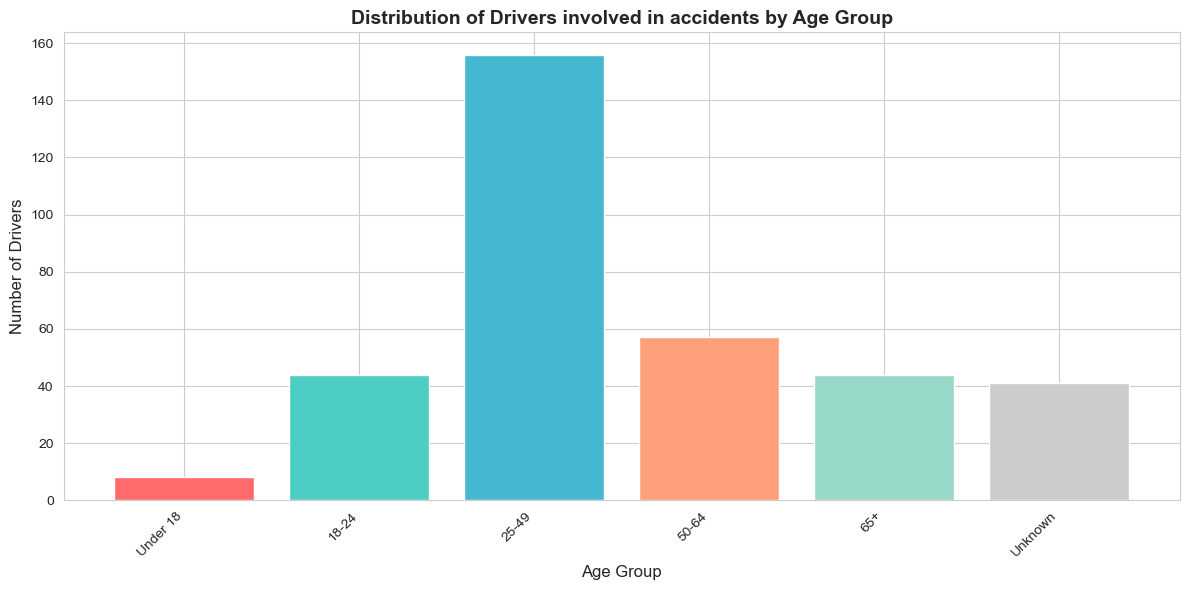

In [165]:
# Driver age distribution
driver_ages = {
    'Under 18': df['num_drivers_under_18'].sum(),
    '18-24': df['num_drivers_18_to_24'].sum(),
    '25-49': df['num_drivers_25_to_49'].sum(),
    '50-64': df['num_drivers_50_to_64'].sum(),
    '65+': df['num_drivers_65_plus'].sum(),
    'Unknown': df['num_drivers_age_unknown'].sum()
}

print("Driver Age Distribution:")
for age_group, count in driver_ages.items():
    print(f"{age_group}: {count:,} ({count/total_drivers*100:.1f}%)")

# Visualize as bar chart
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#CCCCCC']
plt.bar(driver_ages.keys(), driver_ages.values(), color=colors)
plt.title('Distribution of Drivers involved in accidents by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Drivers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Driver Age Group Distribution:
Under 18: 8 (2.3%)
18-24: 44 (12.6%)
25-49: 156 (44.6%)
50-64: 57 (16.3%)
65+: 44 (12.6%)


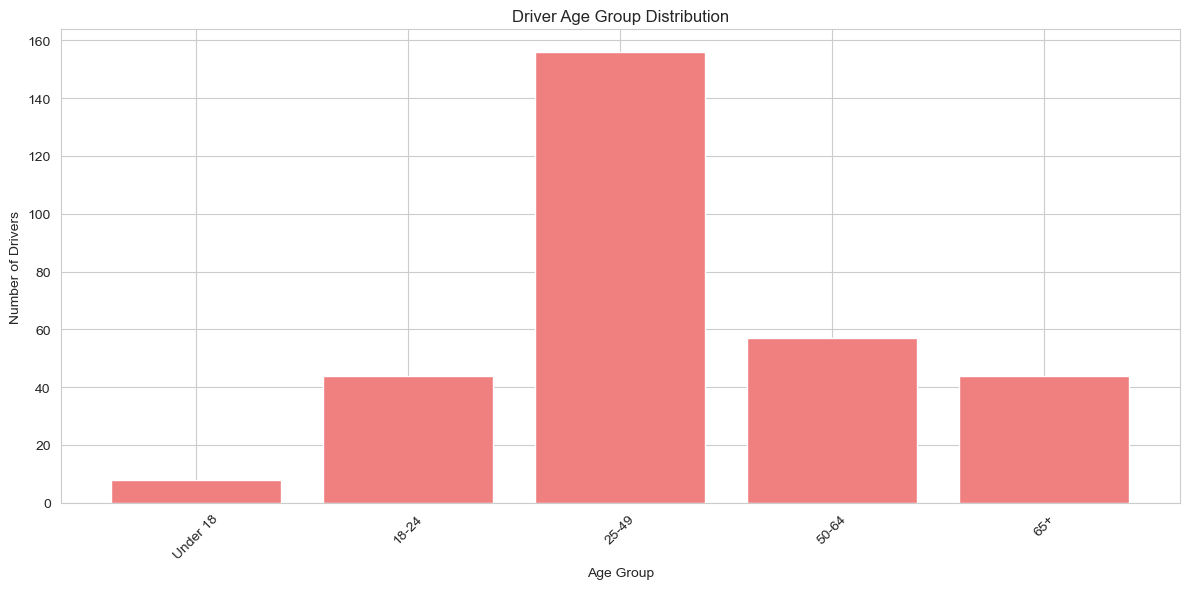

In [166]:
# Driver age group distribution
age_groups = {
    'Under 18': df['num_drivers_under_18'].sum(),
    '18-24': df['num_drivers_18_to_24'].sum(),
    '25-49': df['num_drivers_25_to_49'].sum(),
    '50-64': df['num_drivers_50_to_64'].sum(),
    '65+': df['num_drivers_65_plus'].sum()
}

print("Driver Age Group Distribution:")
for age_group, count in age_groups.items():
    print(f"{age_group}: {count} ({count/total_drivers*100:.1f}%)")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(age_groups.keys(), age_groups.values(), color='lightcoral')
plt.title('Driver Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Vehicle Type Analysis

Vehicle Type Distribution:
Car: 179 (51.1%)
Motorbike: 107 (30.6%)
Van: 30 (8.6%)
Pedestrian: 14 (4.0%)
Bus: 11 (3.1%)
Bicycle: 7 (2.0%)
Unknown: 2 (0.6%)


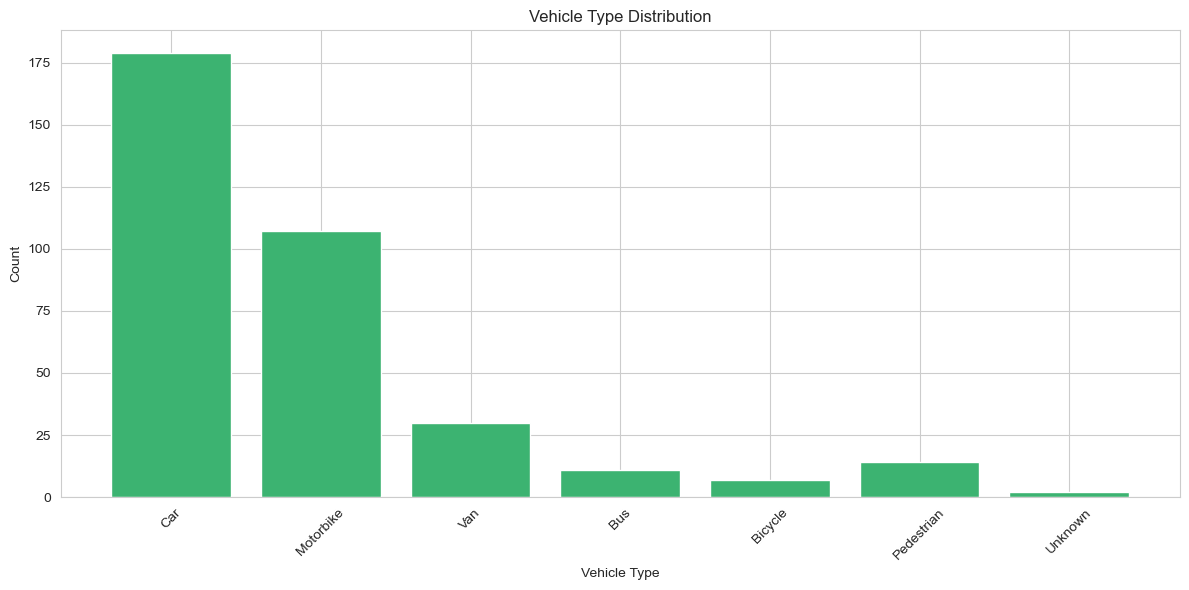

In [167]:
# Vehicle type distribution
vehicle_types = {
    'Car': df['num_vehicle_car'].sum(),
    'Motorbike': df['num_vehicle_motorbike'].sum(),
    'Van': df['num_vehicle_van'].sum(),
    'Bus': df['num_vehicle_bus'].sum(),
    'Bicycle': df['num_vehicle_bicycle'].sum(),
    'Pedestrian': df['num_vehicle_pedestrian'].sum(),
    'Unknown': df['num_vehicle_unknown'].sum()
}

print("Vehicle Type Distribution:")
for vehicle, count in sorted(vehicle_types.items(), key=lambda x: x[1], reverse=True):
    total_vehicles = sum(vehicle_types.values())
    print(f"{vehicle}: {count} ({count/total_vehicles*100:.1f}%)")

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(vehicle_types.keys(), vehicle_types.values(), color='mediumseagreen')
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Injuries Analysis

Total people injured: 282
Average injuries per accident: 1.34


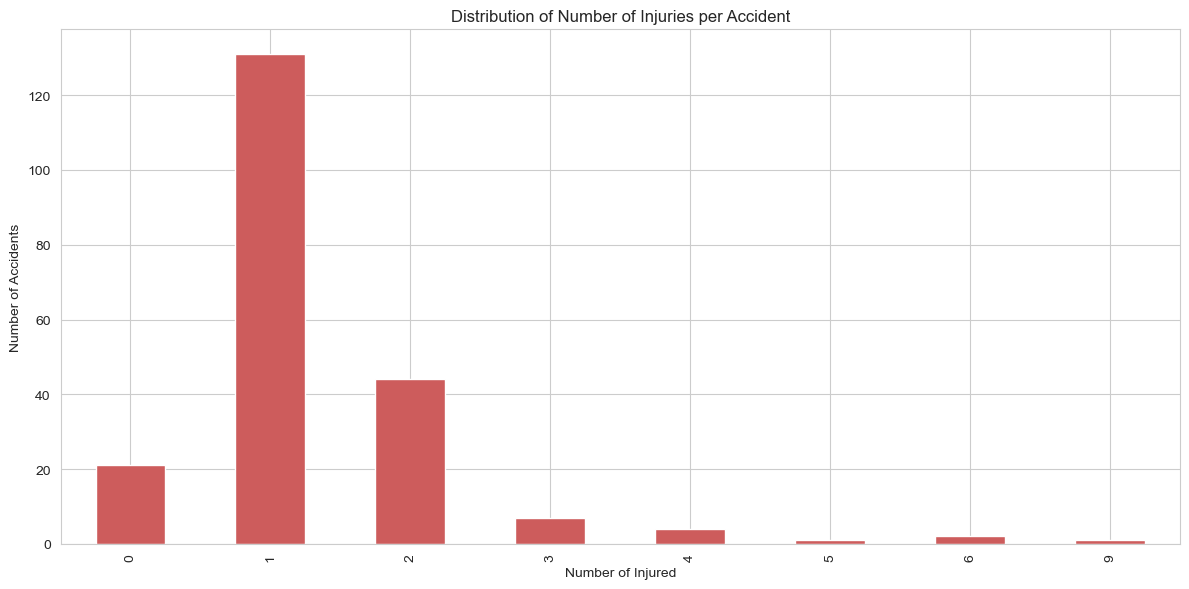

In [168]:
# Total injuries
total_injured = df['total_injured'].sum()
print(f"Total people injured: {total_injured}")
print(f"Average injuries per accident: {df['total_injured'].mean():.2f}")

# Distribution of injuries
plt.figure(figsize=(12, 6))
df['total_injured'].value_counts().sort_index().plot(kind='bar', color='indianred')
plt.title('Distribution of Number of Injuries per Accident')
plt.xlabel('Number of Injured')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

## 10. Weather Conditions Analysis

In [169]:
# Weather statistics
print("Weather Conditions Summary:")
print(f"Temperature (mean): Min={df['temperature_min'].min():.1f}°C, Max={df['temperature_max'].max():.1f}°C, Avg={df['temperature_mean'].mean():.1f}°C")
print(f"Precipitation (sum): Min={df['precipitation_sum'].min():.1f}mm, Max={df['precipitation_sum'].max():.1f}mm, Avg={df['precipitation_sum'].mean():.1f}mm")
print(f"Wind speed (max): Min={df['windspeed_max'].min():.1f}km/h, Max={df['windspeed_max'].max():.1f}km/h, Avg={df['windspeed_max'].mean():.1f}km/h")

# Accidents in rain vs no rain
rain_counts = df['is_raining'].value_counts()
print(f"\nAccidents during rain: {rain_counts.get(True, 0)} ({rain_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Accidents without rain: {rain_counts.get(False, 0)} ({rain_counts.get(False, 0)/len(df)*100:.1f}%)")

Weather Conditions Summary:
Temperature (mean): Min=9.0°C, Max=37.5°C, Avg=21.2°C
Precipitation (sum): Min=0.0mm, Max=66.5mm, Avg=1.1mm
Wind speed (max): Min=6.1km/h, Max=51.4km/h, Avg=20.4km/h

Accidents during rain: 70 (33.2%)
Accidents without rain: 141 (66.8%)


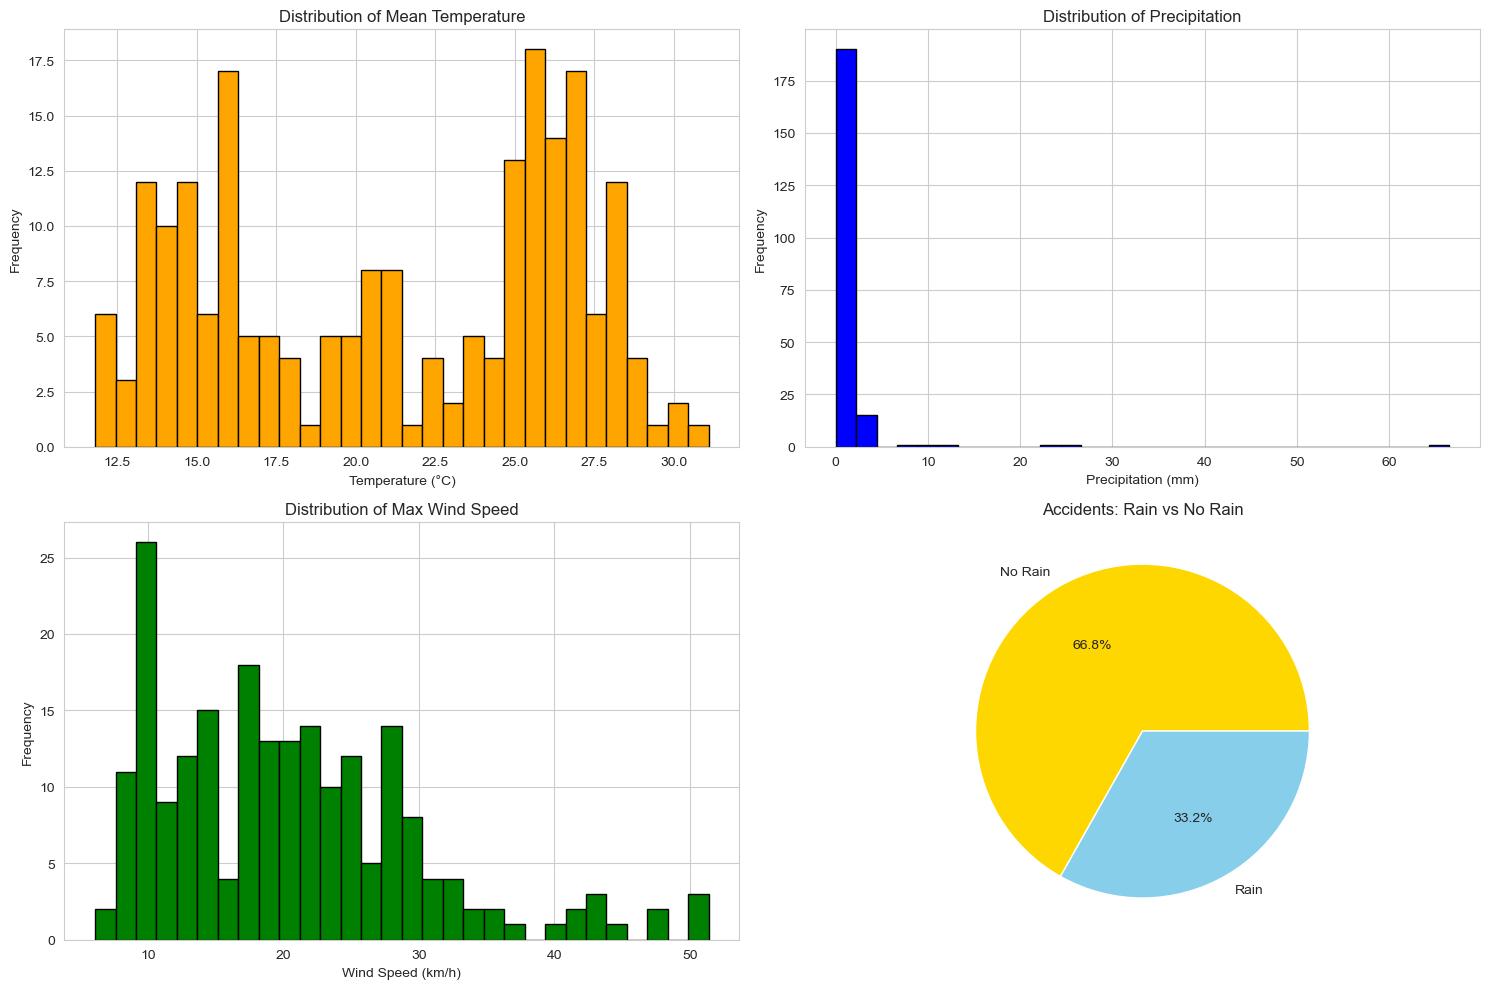

In [170]:
# Visualize weather impact
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature distribution
axes[0, 0].hist(df['temperature_mean'], bins=30, color='orange', edgecolor='black')
axes[0, 0].set_title('Distribution of Mean Temperature')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# Precipitation distribution
axes[0, 1].hist(df['precipitation_sum'], bins=30, color='blue', edgecolor='black')
axes[0, 1].set_title('Distribution of Precipitation')
axes[0, 1].set_xlabel('Precipitation (mm)')
axes[0, 1].set_ylabel('Frequency')

# Wind speed distribution
axes[1, 0].hist(df['windspeed_max'], bins=30, color='green', edgecolor='black')
axes[1, 0].set_title('Distribution of Max Wind Speed')
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('Frequency')

# Rain vs no rain
rain_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', 
                 labels=['No Rain', 'Rain'], colors=['gold', 'skyblue'])
axes[1, 1].set_title('Accidents: Rain vs No Rain')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

## 11. Traffic Level Analysis

Accidents by Traffic Level:
traffic_level
LOW         175
MODERATE     31
HEAVY         5
Name: count, dtype: int64


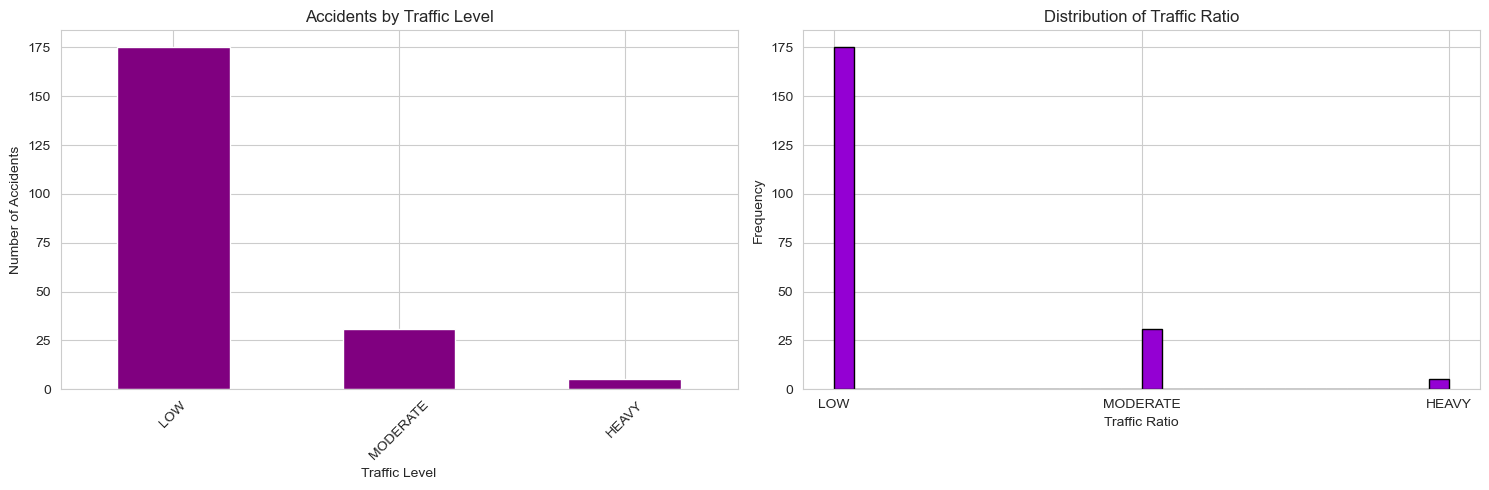

In [171]:
# Traffic level distribution
traffic_level_counts = df['traffic_level'].value_counts()
print("Accidents by Traffic Level:")
print(traffic_level_counts)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
traffic_level_counts.plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Accidents by Traffic Level')
axes[0].set_xlabel('Traffic Level')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Traffic ratio distribution
axes[1].hist(df['traffic_level'], bins=30, color='darkviolet', edgecolor='black')
axes[1].set_title('Distribution of Traffic Ratio')
axes[1].set_xlabel('Traffic Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 12. Special Days Analysis (Weekend, Holidays, School Days)

In [172]:
# Special days analysis
weekend_counts = df['is_weekend'].value_counts()
holiday_counts = df['is_public_holiday_mt'].value_counts()
school_holiday_counts = df['is_school_holiday_mt'].value_counts()
school_day_counts = df['is_school_day_mt'].value_counts()

print("Accidents on Weekends:")
print(f"Weekend: {weekend_counts.get(True, 0)} ({weekend_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Weekday: {weekend_counts.get(False, 0)} ({weekend_counts.get(False, 0)/len(df)*100:.1f}%)")

print("\nAccidents on Public Holidays:")
print(f"Public Holiday: {holiday_counts.get(True, 0)} ({holiday_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Not Public Holiday: {holiday_counts.get(False, 0)} ({holiday_counts.get(False, 0)/len(df)*100:.1f}%)")

print("\nAccidents on School Holidays:")
print(f"School Holiday: {school_holiday_counts.get(True, 0)} ({school_holiday_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Not School Holiday: {school_holiday_counts.get(False, 0)} ({school_holiday_counts.get(False, 0)/len(df)*100:.1f}%)")

print("\nAccidents on School Days:")
print(f"School Day: {school_day_counts.get(True, 0)} ({school_day_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Not School Day: {school_day_counts.get(False, 0)} ({school_day_counts.get(False, 0)/len(df)*100:.1f}%)")

Accidents on Weekends:
Weekend: 59 (28.0%)
Weekday: 152 (72.0%)

Accidents on Public Holidays:
Public Holiday: 9 (4.3%)
Not Public Holiday: 202 (95.7%)

Accidents on School Holidays:
School Holiday: 100 (47.4%)
Not School Holiday: 111 (52.6%)

Accidents on School Days:
School Day: 79 (37.4%)
Not School Day: 132 (62.6%)


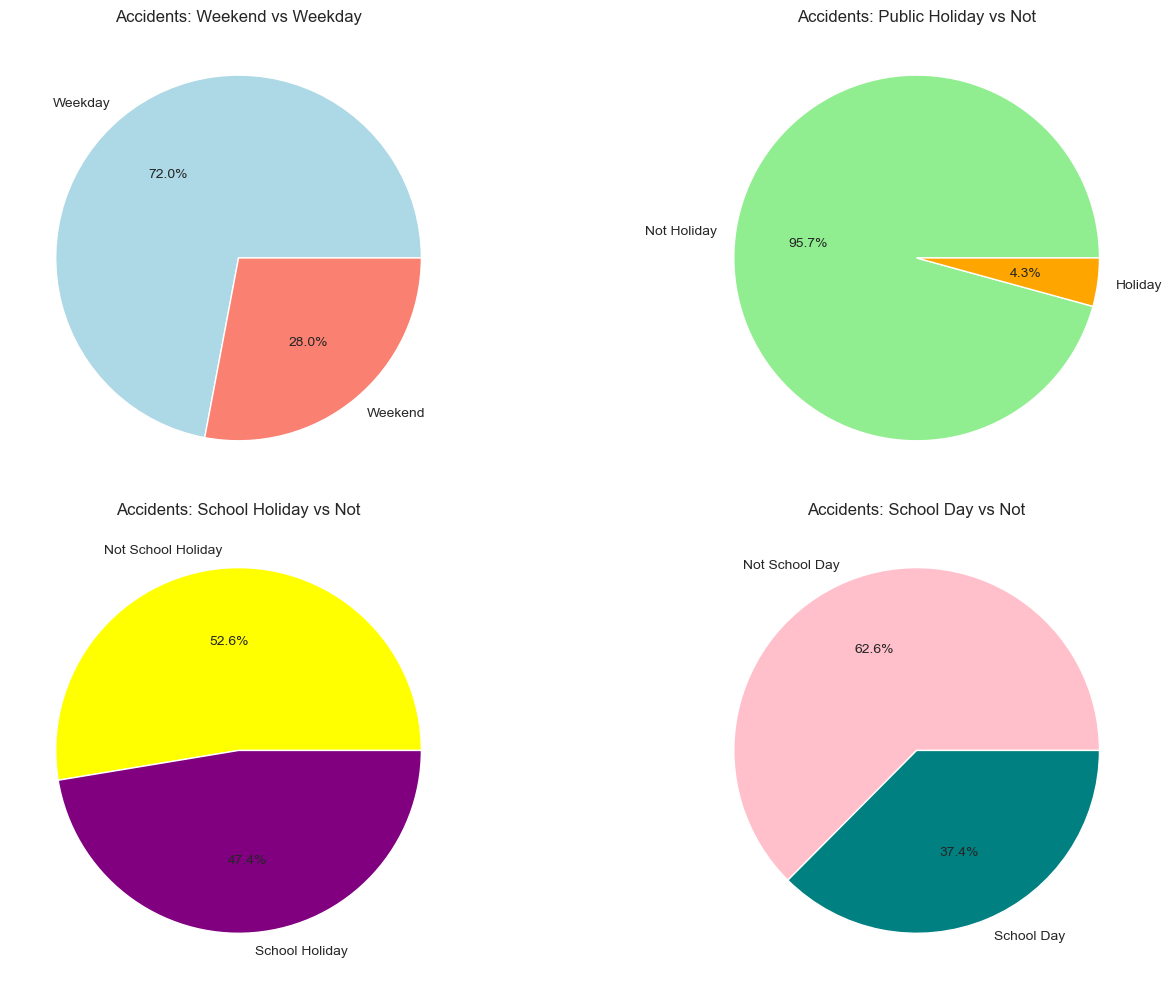

In [173]:
# Visualize special days
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Weekend
weekend_counts.plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', 
                    labels=['Weekday', 'Weekend'], colors=['lightblue', 'salmon'])
axes[0, 0].set_title('Accidents: Weekend vs Weekday')
axes[0, 0].set_ylabel('')

# Public Holiday
holiday_counts.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', 
                    labels=['Not Holiday', 'Holiday'], colors=['lightgreen', 'orange'])
axes[0, 1].set_title('Accidents: Public Holiday vs Not')
axes[0, 1].set_ylabel('')

# School Holiday
school_holiday_counts.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', 
                           labels=['Not School Holiday', 'School Holiday'], colors=['yellow', 'purple'])
axes[1, 0].set_title('Accidents: School Holiday vs Not')
axes[1, 0].set_ylabel('')

# School Day
school_day_counts.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', 
                       labels=['Not School Day', 'School Day'], colors=['pink', 'teal'])
axes[1, 1].set_title('Accidents: School Day vs Not')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

## 13. Correlation Analysis

In [174]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID and date columns
exclude_cols = ['id', 'accident_date_id', 'accident_year', 'accident_month', 
                'accident_day_of_week', 'accident_hour']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print(f"Number of numerical columns for correlation: {len(numerical_cols)}")

Number of numerical columns for correlation: 23


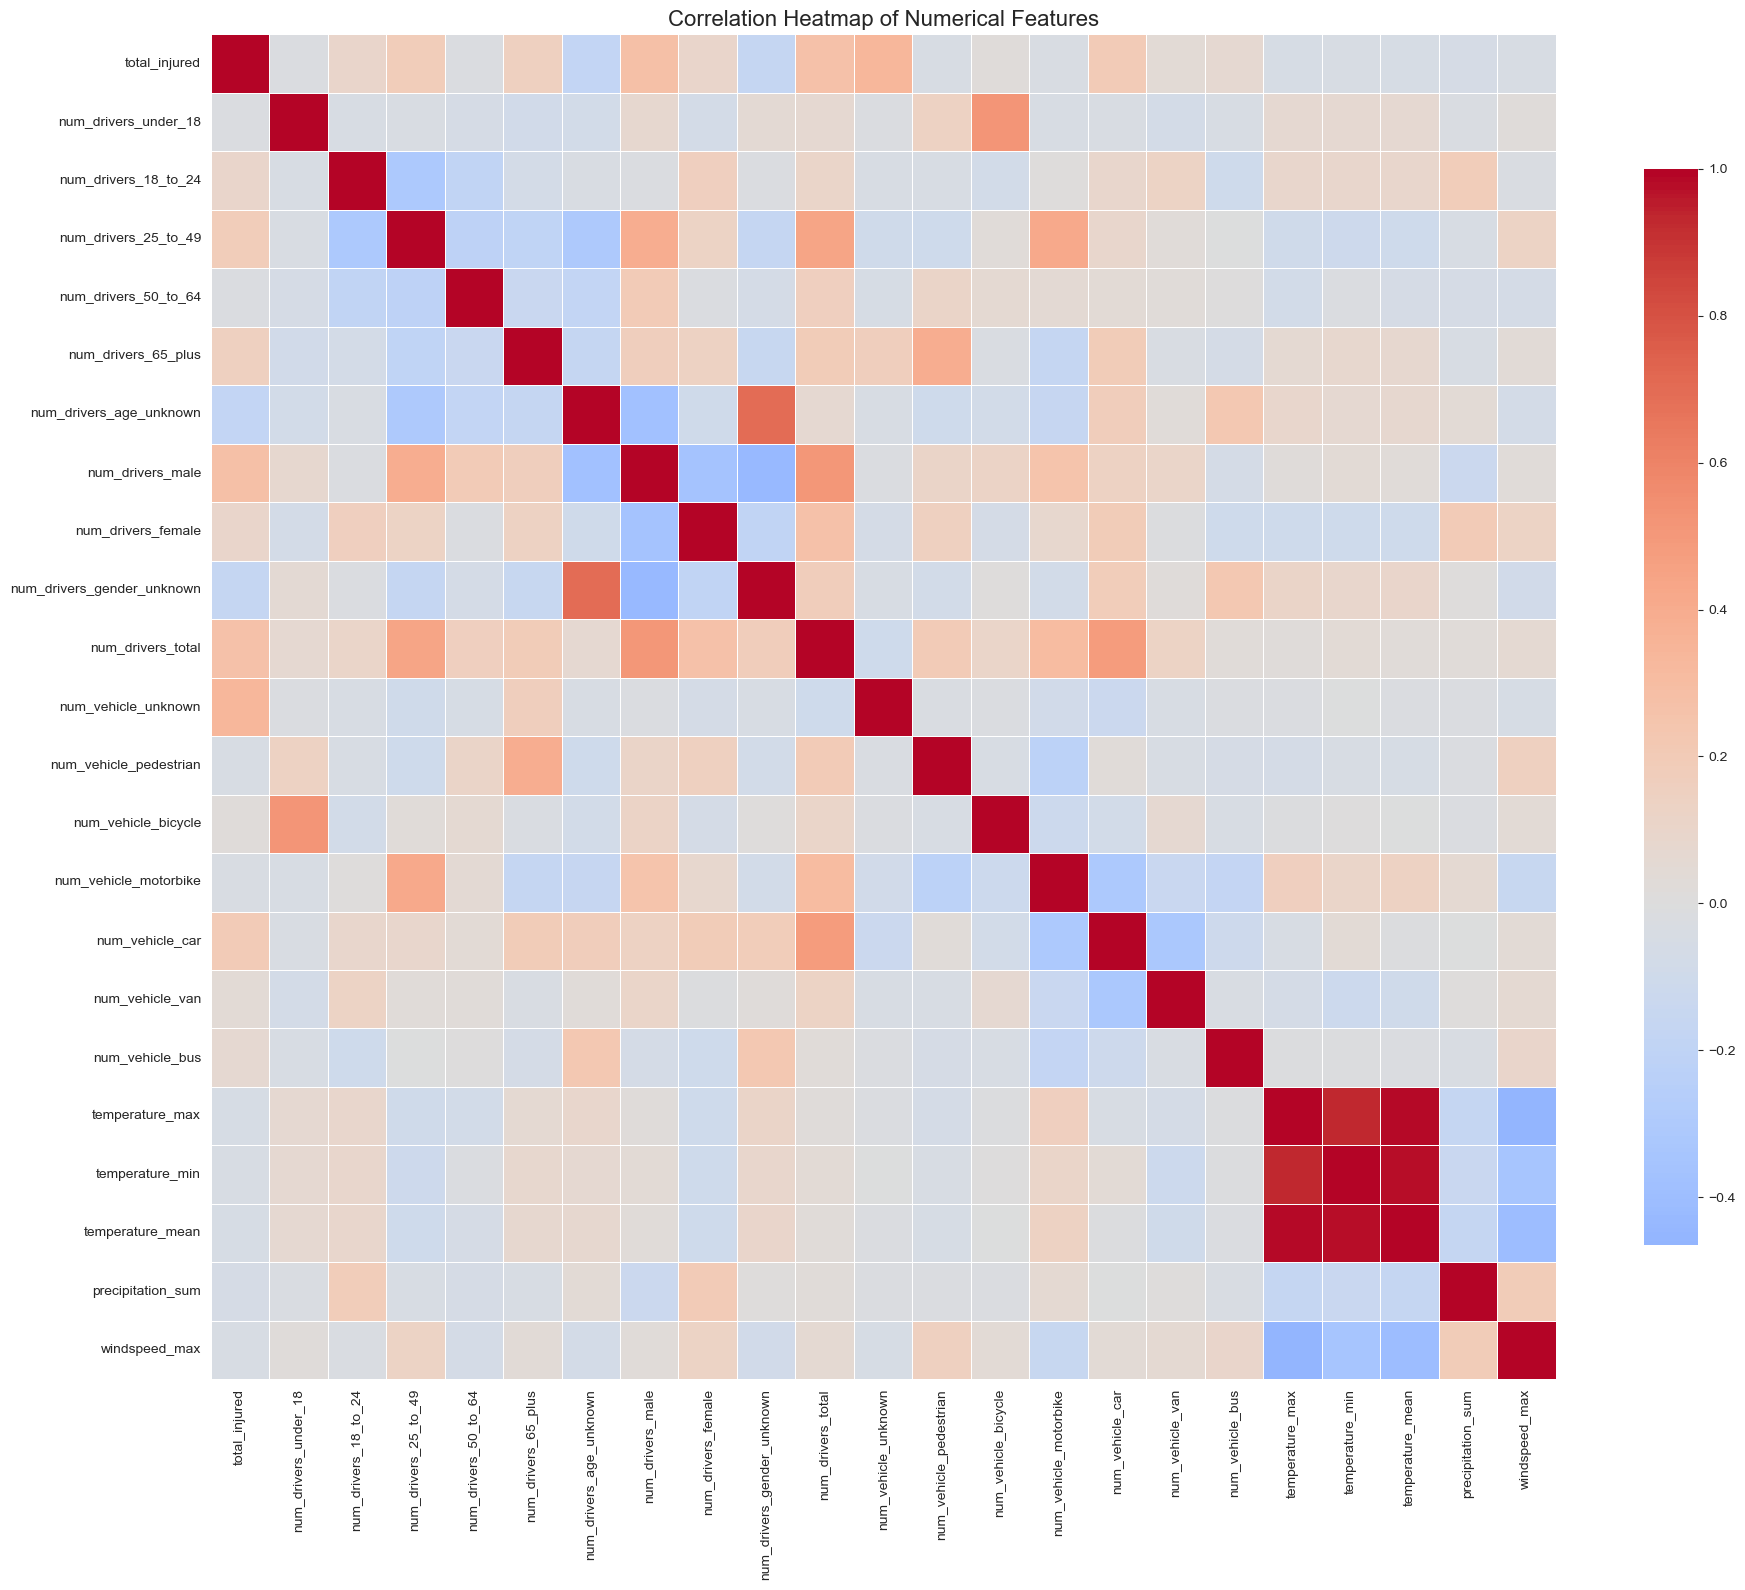

In [175]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap (top features)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## 14. Key Insights and Summary

In [176]:
# Summary statistics
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)
print(f"\n1. DATASET OVERVIEW")
print(f"   - Total accidents: {len(df)}")
print(f"   - Total features: {df.shape[1]}")
print(f"   - Date range: {df['accident_datetime'].min()} to {df['accident_datetime'].max()}")

print(f"\n2. ACCIDENT SEVERITY")
for severity, count in df['accident_severity'].value_counts().items():
    print(f"   - {severity}: {count} ({count/len(df)*100:.1f}%)")

print(f"\n3. CASUALTIES")
print(f"   - Total injured: {df['total_injured'].sum()}")
print(f"   - Average per accident: {df['total_injured'].mean():.2f}")

print(f"\n4. TOP LOCATIONS")
print(f"   - Top city: {df['city'].value_counts().index[0]} ({df['city'].value_counts().values[0]} accidents)")
print(f"   - Top region: {df['region'].value_counts().index[0]} ({df['region'].value_counts().values[0]} accidents)")

print(f"\n5. TIME PATTERNS")
print(f"   - Most accidents in: {df['accident_time_category'].value_counts().index[0]}")
print(f"   - Weekend accidents: {df['is_weekend'].sum()} ({df['is_weekend'].sum()/len(df)*100:.1f}%)")

print(f"\n6. DRIVER DEMOGRAPHICS")
print(f"   - Total drivers: {df['num_drivers_total'].sum()}")
print(f"   - Male drivers: {df['num_drivers_male'].sum()} ({df['num_drivers_male'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"   - Female drivers: {df['num_drivers_female'].sum()} ({df['num_drivers_female'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"   - Age groups:")
print(f"     • Under 18: {df['num_drivers_under_18'].sum()} ({df['num_drivers_under_18'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"     • 18-24: {df['num_drivers_18_to_24'].sum()} ({df['num_drivers_18_to_24'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"     • 25-49: {df['num_drivers_25_to_49'].sum()} ({df['num_drivers_25_to_49'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"     • 50-64: {df['num_drivers_50_to_64'].sum()} ({df['num_drivers_50_to_64'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"     • 65+: {df['num_drivers_65_plus'].sum()} ({df['num_drivers_65_plus'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")
print(f"     • Unknown age: {df['num_drivers_age_unknown'].sum()} ({df['num_drivers_age_unknown'].sum()/df['num_drivers_total'].sum()*100:.1f}%)")

print(f"\n7. VEHICLE TYPES")
print(f"   - Cars: {df['num_vehicle_car'].sum()}")
print(f"   - Motorbikes: {df['num_vehicle_motorbike'].sum()}")
print(f"   - Pedestrians involved: {df['num_vehicle_pedestrian'].sum()}")

print(f"\n8. WEATHER CONDITIONS")
print(f"   - Accidents in rain: {df['is_raining'].sum()} ({df['is_raining'].sum()/len(df)*100:.1f}%)")
print(f"   - Average temperature: {df['temperature_mean'].mean():.1f}°C")

print(f"\n9. TRAFFIC CONDITIONS")
traffic_counts = df['traffic_level'].value_counts()
for level, count in traffic_counts.items():
    print(f"   - {level}: {count} ({count/len(df)*100:.1f}%)")

print("\n" + "="*80)

EXPLORATORY DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW
   - Total accidents: 211
   - Total features: 58
   - Date range: 2024-03-19 00:00:00 to 2025-10-10 09:00:00

2. ACCIDENT SEVERITY
   - grievious: 85 (40.3%)
   - serious: 74 (35.1%)
   - fatal: 28 (13.3%)
   - not injured: 17 (8.1%)
   - slight: 7 (3.3%)

3. CASUALTIES
   - Total injured: 282
   - Average per accident: 1.34

4. TOP LOCATIONS
   - Top city: naxxar (18 accidents)
   - Top region: Central (58 accidents)

5. TIME PATTERNS
   - Most accidents in: afternoon
   - Weekend accidents: 59 (28.0%)

6. DRIVER DEMOGRAPHICS
   - Total drivers: 350
   - Male drivers: 232 (66.3%)
   - Female drivers: 67 (19.1%)
   - Age groups:
     • Under 18: 8 (2.3%)
     • 18-24: 44 (12.6%)
     • 25-49: 156 (44.6%)
     • 50-64: 57 (16.3%)
     • 65+: 44 (12.6%)
     • Unknown age: 41 (11.7%)

7. VEHICLE TYPES
   - Cars: 179
   - Motorbikes: 107
   - Pedestrians involved: 14

8. WEATHER CONDITIONS
   - Accidents in rain: 70 (33.2%)
   - Aver

## 15. Accident Severity Analysis - Multi-Feature Comparison

This section analyzes how accident severity relates to various features in the dataset.

### 15.1 Severity vs Time Category

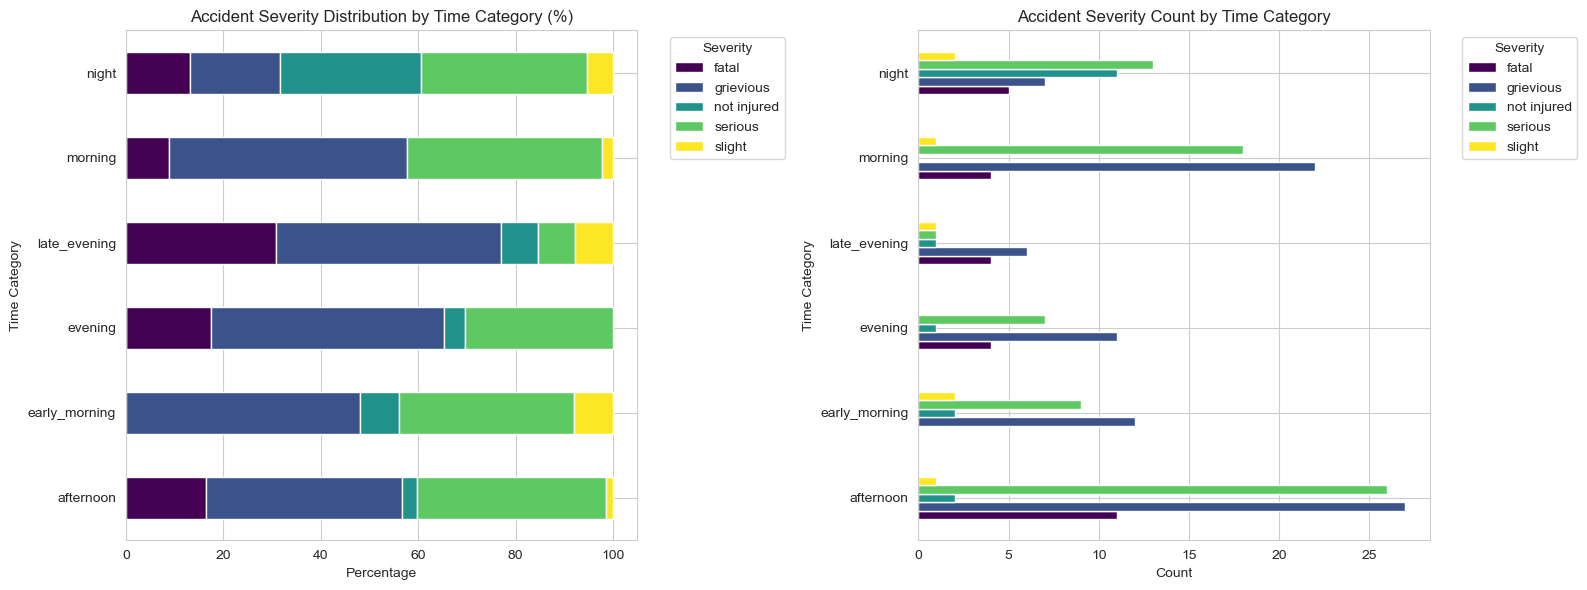


TIME CATEGORY ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS

afternoon:
  Total accidents: 67 (31.75% of all accidents)
  Severity distribution:
    fatal: 16.42%
    grievious: 40.30%
    not injured: 2.99%
    serious: 38.81%
    slight: 1.49%

early_morning:
  Total accidents: 25 (11.85% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 48.00%
    not injured: 8.00%
    serious: 36.00%
    slight: 8.00%

evening:
  Total accidents: 23 (10.90% of all accidents)
  Severity distribution:
    fatal: 17.39%
    grievious: 47.83%
    not injured: 4.35%
    serious: 30.43%
    slight: 0.00%

late_evening:
  Total accidents: 13 (6.16% of all accidents)
  Severity distribution:
    fatal: 30.77%
    grievious: 46.15%
    not injured: 7.69%
    serious: 7.69%
    slight: 7.69%

morning:
  Total accidents: 45 (21.33% of all accidents)
  Severity distribution:
    fatal: 8.89%
    grievious: 48.89%
    not injured: 0.00%
    serious: 40.00%
    slight: 2.22%

night:
  Tot

In [177]:
# Severity vs Time Category
severity_time = pd.crosstab(df['accident_time_category'], df['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_time.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution by Time Category (%)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Time Category')
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_time_counts = pd.crosstab(df['accident_time_category'], df['accident_severity'])
severity_time_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count by Time Category')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Time Category')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TIME CATEGORY ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS")
print("="*80)
time_category_counts = df['accident_time_category'].value_counts()
for time_cat in severity_time.index:
    count = time_category_counts[time_cat]
    pct = count / len(df) * 100
    print(f"\n{time_cat}:")
    print(f"  Total accidents: {count} ({pct:.2f}% of all accidents)")
    print(f"  Severity distribution:")
    for severity in severity_time.columns:
        sev_pct = severity_time.loc[time_cat, severity]
        print(f"    {severity}: {sev_pct:.2f}%")

### 15.2 Severity vs Number of Drivers

<Figure size 1000x600 with 0 Axes>

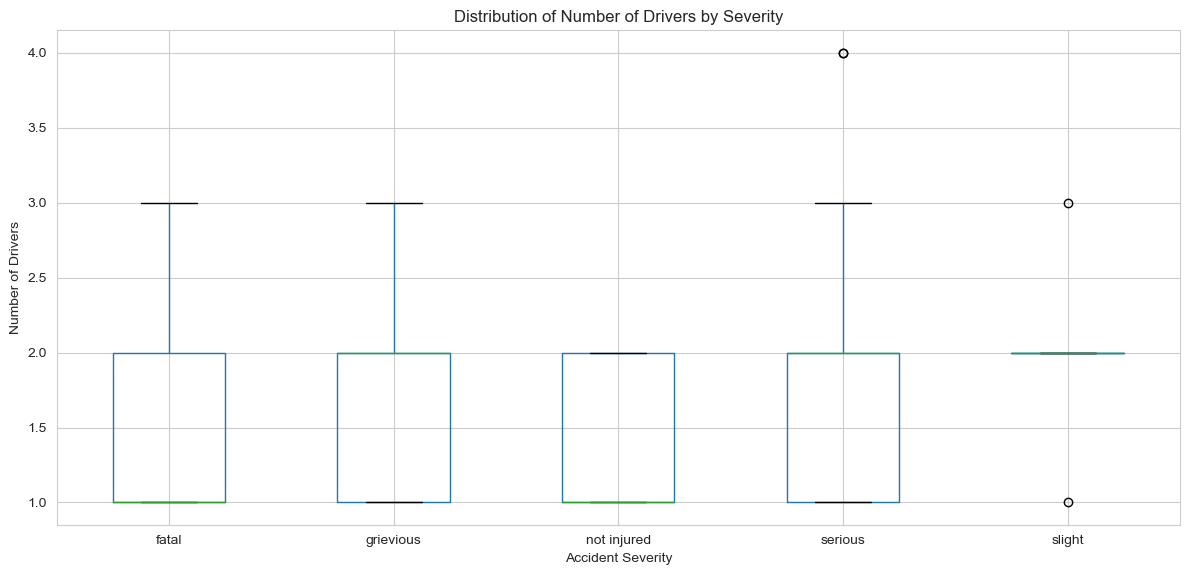


Number of Drivers Statistics by Severity:
                   count      mean       std  min  25%  50%  75%  max
accident_severity                                                    
fatal               28.0  1.607143  0.737327  1.0  1.0  1.0  2.0  3.0
grievious           85.0  1.611765  0.536615  1.0  1.0  2.0  2.0  3.0
not injured         17.0  1.470588  0.514496  1.0  1.0  1.0  2.0  2.0
serious             74.0  1.743243  0.620667  1.0  1.0  2.0  2.0  4.0
slight               7.0  2.000000  0.577350  1.0  2.0  2.0  2.0  3.0

Average Drivers per Accident by Severity:
  slight: 2.00
  serious: 1.74
  grievious: 1.61
  fatal: 1.61
  not injured: 1.47


In [178]:
# Severity vs Number of Drivers
severity_by_drivers = df.groupby('accident_severity')['num_drivers_total'].describe()

# Box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='num_drivers_total', by='accident_severity')
plt.title('Distribution of Number of Drivers by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Drivers')
plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nNumber of Drivers Statistics by Severity:")
print(severity_by_drivers)

# Average drivers per severity
avg_injured = df.groupby('accident_severity')['num_drivers_total'].mean().sort_values(ascending=False)
print("\nAverage Drivers per Accident by Severity:")
for severity, avg in avg_injured.items():
    print(f"  {severity}: {avg:.2f}")

### 15.3 Severity vs Total Injured

<Figure size 1000x600 with 0 Axes>

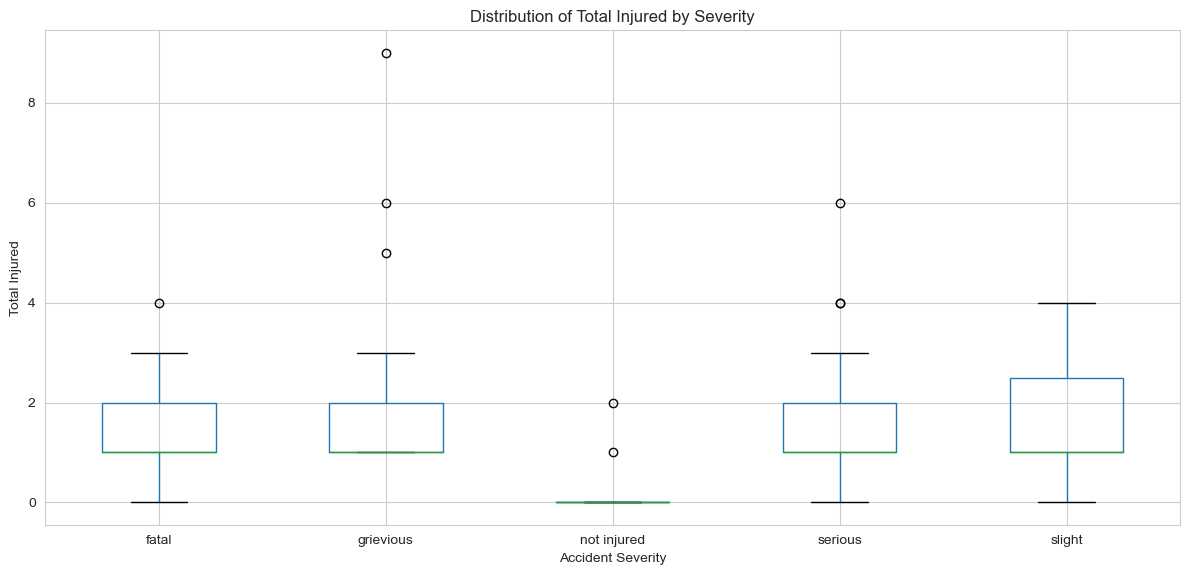


Total Injured Statistics by Severity:
                   count      mean       std  min  25%  50%  75%  max
accident_severity                                                    
fatal               28.0  1.428571  0.997351  0.0  1.0  1.0  2.0  4.0
grievious           85.0  1.447059  1.159904  1.0  1.0  1.0  2.0  9.0
not injured         17.0  0.176471  0.528594  0.0  0.0  0.0  0.0  2.0
serious             74.0  1.405405  0.858781  0.0  1.0  1.0  2.0  6.0
slight               7.0  1.714286  1.380131  0.0  1.0  1.0  2.5  4.0

Average Injured per Accident by Severity:
  slight: 1.71
  grievious: 1.45
  fatal: 1.43
  serious: 1.41
  not injured: 0.18


In [179]:
# Severity vs Total Injured
severity_by_injured = df.groupby('accident_severity')['total_injured'].describe()

# Box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='total_injured', by='accident_severity')
plt.title('Distribution of Total Injured by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Total Injured')
plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nTotal Injured Statistics by Severity:")
print(severity_by_injured)

# Average injured per severity
avg_injured = df.groupby('accident_severity')['total_injured'].mean().sort_values(ascending=False)
print("\nAverage Injured per Accident by Severity:")
for severity, avg in avg_injured.items():
    print(f"  {severity}: {avg:.2f}")

### 15.4 Severity vs Driver Age Brackets (Weighted)

Driver Age Bracket Distribution by Accident Severity (WEIGHTED BY ACCIDENT):

fatal: 28 accidents (13.3% of all accidents)
Average drivers per accident in each age bracket:
  Under 18: 0.071 avg/accident (4.4% of drivers in fatal accidents)
  18-24: 0.429 avg/accident (26.7% of drivers in fatal accidents)
  25-49: 0.607 avg/accident (37.8% of drivers in fatal accidents)
  50-64: 0.250 avg/accident (15.6% of drivers in fatal accidents)
  65+: 0.179 avg/accident (11.1% of drivers in fatal accidents)
  Unknown: 0.071 avg/accident (4.4% of drivers in fatal accidents)

grievious: 85 accidents (40.3% of all accidents)
Average drivers per accident in each age bracket:
  Under 18: 0.035 avg/accident (2.2% of drivers in grievious accidents)
  18-24: 0.224 avg/accident (13.9% of drivers in grievious accidents)
  25-49: 0.894 avg/accident (55.5% of drivers in grievious accidents)
  50-64: 0.235 avg/accident (14.6% of drivers in grievious accidents)
  65+: 0.176 avg/accident (10.9% of drivers in g

<Figure size 1400x700 with 0 Axes>

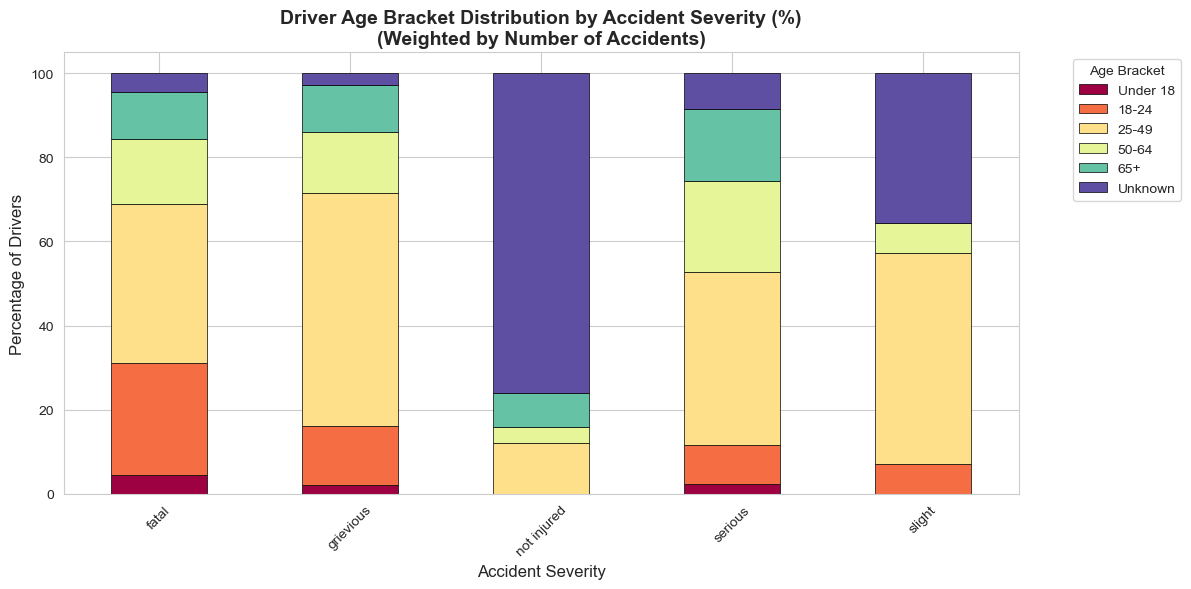

In [180]:
# Severity vs Driver Age Brackets (Weighted by Accident)
age_bracket_cols = ['num_drivers_under_18', 'num_drivers_18_to_24', 'num_drivers_25_to_49', 
                    'num_drivers_50_to_64', 'num_drivers_65_plus', 'num_drivers_age_unknown']

# Calculate totals by severity and age bracket
severity_age_totals = df.groupby('accident_severity')[age_bracket_cols].sum()

# Calculate average per accident (weighted by number of accidents)
severity_accident_counts = df['accident_severity'].value_counts()
severity_age_avg = severity_age_totals.div(severity_accident_counts, axis=0)

# Create normalized version (percentages)
severity_age_pct = severity_age_totals.div(severity_age_totals.sum(axis=1), axis=0) * 100

print("Driver Age Bracket Distribution by Accident Severity (WEIGHTED BY ACCIDENT):")
print("="*80)
for severity in severity_age_avg.index:
    num_accidents = severity_accident_counts[severity]
    print(f"\n{severity}: {num_accidents} accidents ({num_accidents/len(df)*100:.1f}% of all accidents)")
    print(f"Average drivers per accident in each age bracket:")
    for col, label in zip(age_bracket_cols, ['Under 18', '18-24', '25-49', '50-64', '65+', 'Unknown']):
        avg = severity_age_avg.loc[severity, col]
        pct = severity_age_pct.loc[severity, col]
        print(f"  {label}: {avg:.3f} avg/accident ({pct:.1f}% of drivers in {severity} accidents)")

# Visualize as stacked bar chart (percentage)
plt.figure(figsize=(14, 7))
severity_age_pct.plot(kind='bar', stacked=True, colormap='Spectral', edgecolor='black', linewidth=0.5)
plt.title('Driver Age Bracket Distribution by Accident Severity (%)\n(Weighted by Number of Accidents)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Percentage of Drivers', fontsize=12)
plt.legend(title='Age Bracket', labels=['Under 18', '18-24', '25-49', '50-64', '65+', 'Unknown'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 15.5 Severity vs Driver Gender (Weighted)

Driver Gender Distribution by Accident Severity (WEIGHTED BY ACCIDENT):

fatal: 28 accidents (13.3% of all accidents)
Average drivers per accident by gender:
  Male: 1.143 avg/accident (71.1% of drivers in fatal accidents)
  Female: 0.214 avg/accident (13.3% of drivers in fatal accidents)
  Unknown: 0.250 avg/accident (15.6% of drivers in fatal accidents)

grievious: 85 accidents (40.3% of all accidents)
Average drivers per accident by gender:
  Male: 1.165 avg/accident (72.3% of drivers in grievious accidents)
  Female: 0.329 avg/accident (20.4% of drivers in grievious accidents)
  Unknown: 0.118 avg/accident (7.3% of drivers in grievious accidents)

not injured: 17 accidents (8.1% of all accidents)
Average drivers per accident by gender:
  Male: 0.412 avg/accident (28.0% of drivers in not injured accidents)
  Female: 0.176 avg/accident (12.0% of drivers in not injured accidents)
  Unknown: 0.882 avg/accident (60.0% of drivers in not injured accidents)

serious: 74 accidents (35.1% of

<Figure size 1200x600 with 0 Axes>

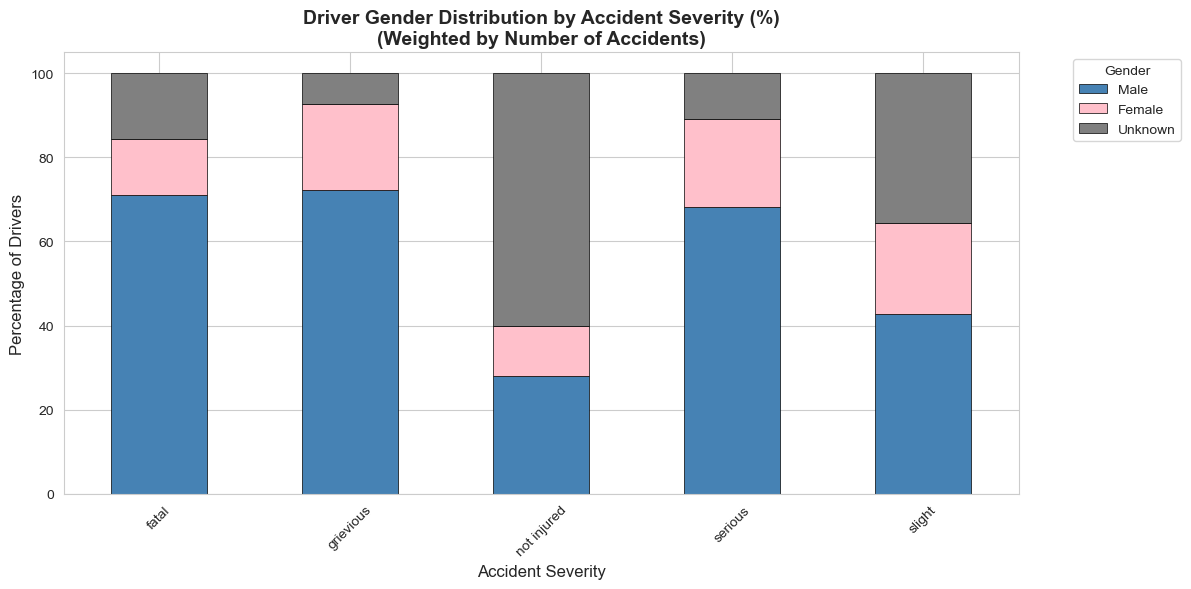

In [181]:
# Severity vs Driver Gender (Weighted by Accident)
gender_cols = ['num_drivers_male', 'num_drivers_female', 'num_drivers_gender_unknown']

# Calculate totals by severity and gender
severity_gender_totals = df.groupby('accident_severity')[gender_cols].sum()

# Calculate average per accident (weighted by number of accidents)
severity_gender_avg = severity_gender_totals.div(severity_accident_counts, axis=0)

# Create normalized version (percentages)
severity_gender_pct = severity_gender_totals.div(severity_gender_totals.sum(axis=1), axis=0) * 100

print("Driver Gender Distribution by Accident Severity (WEIGHTED BY ACCIDENT):")
print("="*80)
for severity in severity_gender_avg.index:
    num_accidents = severity_accident_counts[severity]
    print(f"\n{severity}: {num_accidents} accidents ({num_accidents/len(df)*100:.1f}% of all accidents)")
    print(f"Average drivers per accident by gender:")
    for col, label in zip(gender_cols, ['Male', 'Female', 'Unknown']):
        avg = severity_gender_avg.loc[severity, col]
        pct = severity_gender_pct.loc[severity, col]
        print(f"  {label}: {avg:.3f} avg/accident ({pct:.1f}% of drivers in {severity} accidents)")

# Visualize as stacked bar chart (percentage)
plt.figure(figsize=(12, 6))
severity_gender_pct.plot(kind='bar', stacked=True, color=['steelblue', 'pink', 'gray'], 
                          edgecolor='black', linewidth=0.5)
plt.title('Driver Gender Distribution by Accident Severity (%)\n(Weighted by Number of Accidents)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Percentage of Drivers', fontsize=12)
plt.legend(title='Gender', labels=['Male', 'Female', 'Unknown'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 15.6 Severity vs City (Top Cities)

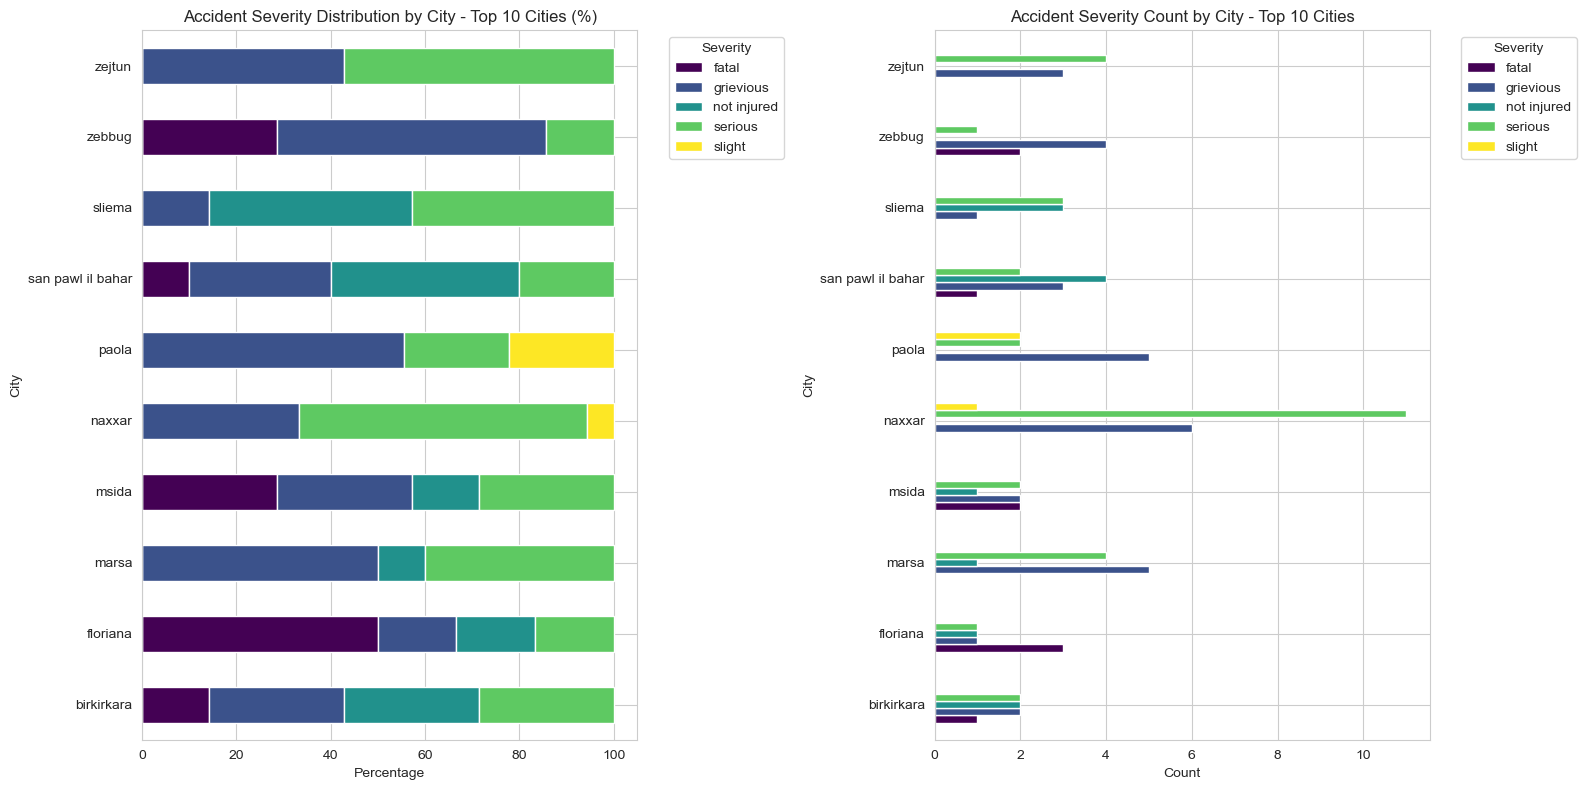


TOP 10 CITIES - WEIGHTED BY NUMBER OF ACCIDENTS

birkirkara:
  Total accidents: 7 (3.32% of all accidents)
  Severity distribution:
    fatal: 14.29%
    grievious: 28.57%
    not injured: 28.57%
    serious: 28.57%
    slight: 0.00%

floriana:
  Total accidents: 6 (2.84% of all accidents)
  Severity distribution:
    fatal: 50.00%
    grievious: 16.67%
    not injured: 16.67%
    serious: 16.67%
    slight: 0.00%

marsa:
  Total accidents: 10 (4.74% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 50.00%
    not injured: 10.00%
    serious: 40.00%
    slight: 0.00%

msida:
  Total accidents: 7 (3.32% of all accidents)
  Severity distribution:
    fatal: 28.57%
    grievious: 28.57%
    not injured: 14.29%
    serious: 28.57%
    slight: 0.00%

naxxar:
  Total accidents: 18 (8.53% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 33.33%
    not injured: 0.00%
    serious: 61.11%
    slight: 5.56%

paola:
  Total accidents: 9 (4.27% of

In [182]:
# Severity vs City (Top 10 cities)
top_10_cities = df['city'].value_counts().head(10).index
df_top_cities = df[df['city'].isin(top_10_cities)]

severity_city = pd.crosstab(df_top_cities['city'], df_top_cities['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Stacked bar chart
severity_city.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution by City - Top 10 Cities (%)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('City')
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_city_counts = pd.crosstab(df_top_cities['city'], df_top_cities['accident_severity'])
severity_city_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count by City - Top 10 Cities')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('City')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TOP 10 CITIES - WEIGHTED BY NUMBER OF ACCIDENTS")
print("="*80)
city_counts = df['city'].value_counts().head(10)
for city in severity_city.index:
    count = city_counts[city]
    pct = count / len(df) * 100
    print(f"\n{city}:")
    print(f"  Total accidents: {count} ({pct:.2f}% of all accidents)")
    print(f"  Severity distribution:")
    for severity in severity_city.columns:
        sev_pct = severity_city.loc[city, severity]
        print(f"    {severity}: {sev_pct:.2f}%")

### 15.7 Severity vs Vehicle Types

Vehicle Type Distribution by Accident Severity (WEIGHTED BY ACCIDENT):

fatal: 28 accidents (13.3% of all accidents)
Average vehicles per accident by type:
  Unknown: 0.000 avg/accident (0.0% of vehicles in fatal accidents)
  Pedestrian: 0.036 avg/accident (2.2% of vehicles in fatal accidents)
  Bicycle: 0.036 avg/accident (2.2% of vehicles in fatal accidents)
  Motorbike: 0.429 avg/accident (26.7% of vehicles in fatal accidents)
  Car: 0.821 avg/accident (51.1% of vehicles in fatal accidents)
  Van: 0.179 avg/accident (11.1% of vehicles in fatal accidents)
  Bus: 0.107 avg/accident (6.7% of vehicles in fatal accidents)

grievious: 85 accidents (40.3% of all accidents)
Average vehicles per accident by type:
  Unknown: 0.024 avg/accident (1.5% of vehicles in grievious accidents)
  Pedestrian: 0.035 avg/accident (2.2% of vehicles in grievious accidents)
  Bicycle: 0.047 avg/accident (2.9% of vehicles in grievious accidents)
  Motorbike: 0.529 avg/accident (32.8% of vehicles in grievious 

<Figure size 1400x700 with 0 Axes>

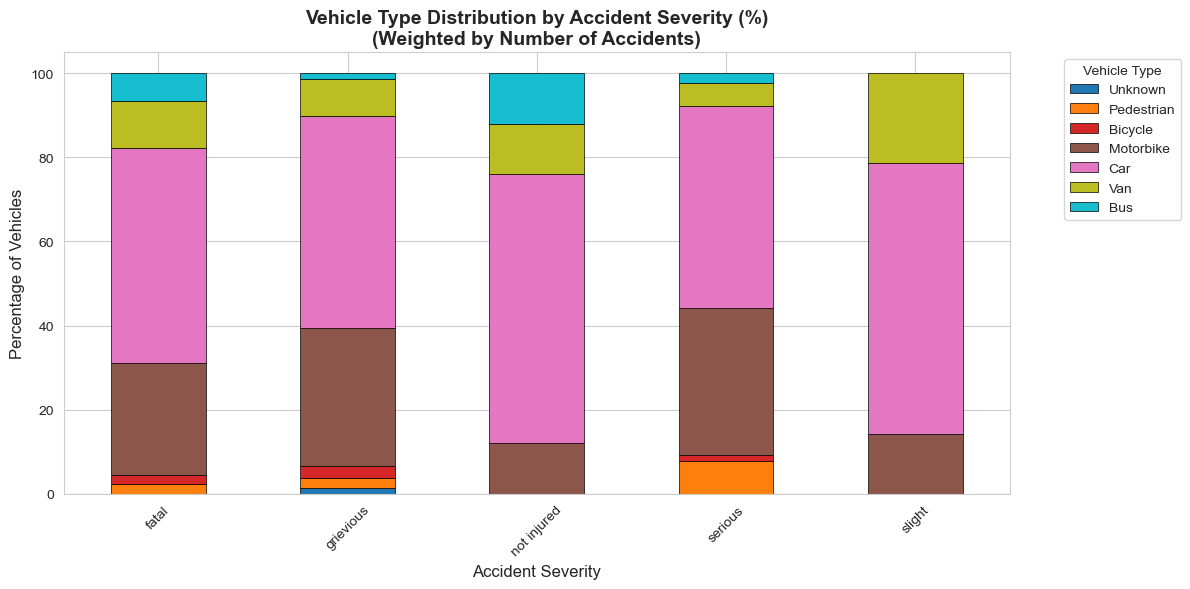

In [183]:
# Severity vs Vehicle Types (Weighted by Accident)
vehicle_cols = ['num_vehicle_unknown', 'num_vehicle_pedestrian', 'num_vehicle_bicycle', 
                'num_vehicle_motorbike', 'num_vehicle_car', 'num_vehicle_van', 'num_vehicle_bus']

# Calculate totals by severity and vehicle type
severity_vehicle_totals = df.groupby('accident_severity')[vehicle_cols].sum()

# Calculate average per accident (weighted by number of accidents)
severity_vehicle_avg = severity_vehicle_totals.div(severity_accident_counts, axis=0)

# Create normalized version (percentages)
severity_vehicle_pct = severity_vehicle_totals.div(severity_vehicle_totals.sum(axis=1), axis=0) * 100

print("Vehicle Type Distribution by Accident Severity (WEIGHTED BY ACCIDENT):")
print("="*80)
for severity in severity_vehicle_avg.index:
    num_accidents = severity_accident_counts[severity]
    print(f"\n{severity}: {num_accidents} accidents ({num_accidents/len(df)*100:.1f}% of all accidents)")
    print(f"Average vehicles per accident by type:")
    for col, label in zip(vehicle_cols, ['Unknown', 'Pedestrian', 'Bicycle', 'Motorbike', 'Car', 'Van', 'Bus']):
        avg = severity_vehicle_avg.loc[severity, col]
        pct = severity_vehicle_pct.loc[severity, col]
        print(f"  {label}: {avg:.3f} avg/accident ({pct:.1f}% of vehicles in {severity} accidents)")

# Visualize as stacked bar chart (percentage)
plt.figure(figsize=(14, 7))
severity_vehicle_pct.plot(kind='bar', stacked=True, colormap='tab10', edgecolor='black', linewidth=0.5)
plt.title('Vehicle Type Distribution by Accident Severity (%)\n(Weighted by Number of Accidents)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Percentage of Vehicles', fontsize=12)
plt.legend(title='Vehicle Type', labels=['Unknown', 'Pedestrian', 'Bicycle', 'Motorbike', 'Car', 'Van', 'Bus'], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 15.8 Severity vs Street Type

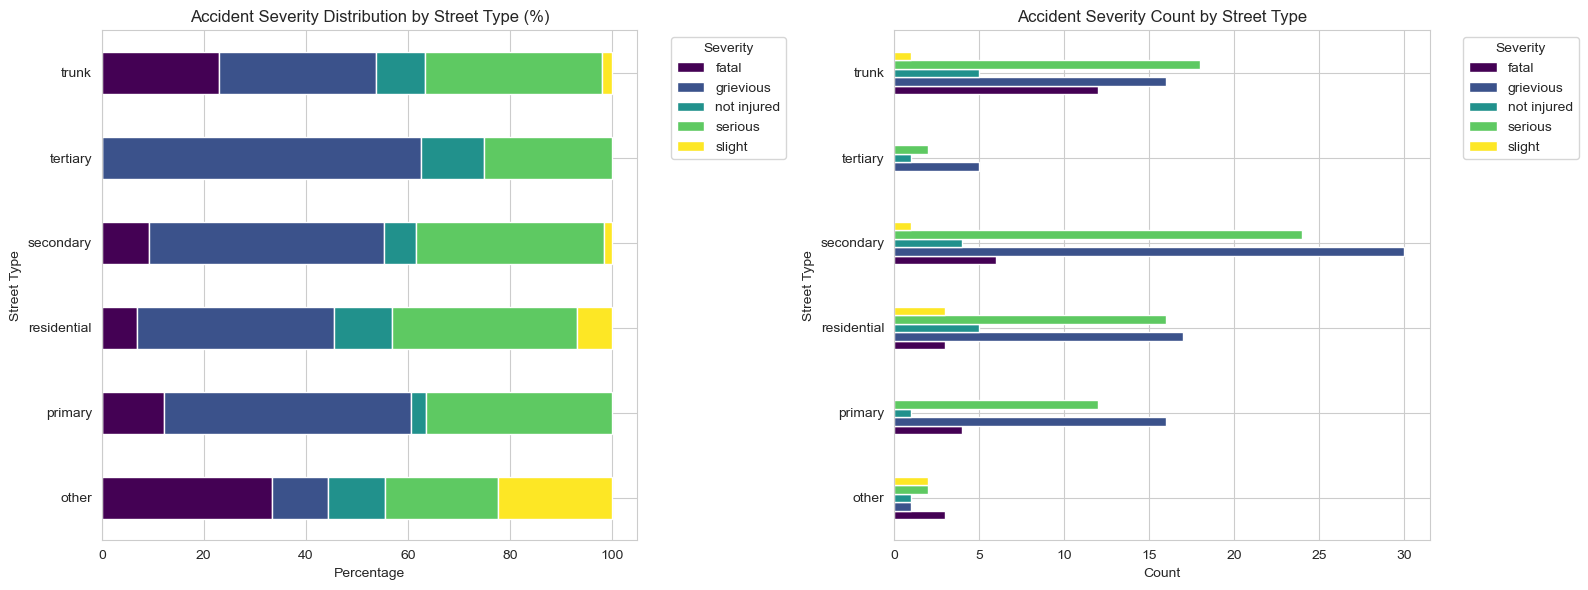


STREET TYPE ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS

other:
  Total accidents: 9 (4.27% of all accidents)
  Severity distribution:
    fatal: 33.33%
    grievious: 11.11%
    not injured: 11.11%
    serious: 22.22%
    slight: 22.22%

primary:
  Total accidents: 33 (15.64% of all accidents)
  Severity distribution:
    fatal: 12.12%
    grievious: 48.48%
    not injured: 3.03%
    serious: 36.36%
    slight: 0.00%

residential:
  Total accidents: 44 (20.85% of all accidents)
  Severity distribution:
    fatal: 6.82%
    grievious: 38.64%
    not injured: 11.36%
    serious: 36.36%
    slight: 6.82%

secondary:
  Total accidents: 65 (30.81% of all accidents)
  Severity distribution:
    fatal: 9.23%
    grievious: 46.15%
    not injured: 6.15%
    serious: 36.92%
    slight: 1.54%

tertiary:
  Total accidents: 8 (3.79% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 62.50%
    not injured: 12.50%
    serious: 25.00%
    slight: 0.00%

trunk:
  Total accide

In [184]:
# Severity vs Street Type
severity_street = pd.crosstab(df['street_type'], df['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_street.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution by Street Type (%)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Street Type')
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_street_counts = pd.crosstab(df['street_type'], df['accident_severity'])
severity_street_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count by Street Type')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Street Type')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STREET TYPE ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS")
print("="*80)
street_type_counts = df['street_type'].value_counts()
for street_type in severity_street.index:
    count = street_type_counts[street_type]
    pct = count / len(df) * 100
    print(f"\n{street_type}:")
    print(f"  Total accidents: {count} ({pct:.2f}% of all accidents)")
    print(f"  Severity distribution:")
    for severity in severity_street.columns:
        sev_pct = severity_street.loc[street_type, severity]
        print(f"    {severity}: {sev_pct:.2f}%")

### 15.9 Severity vs Region

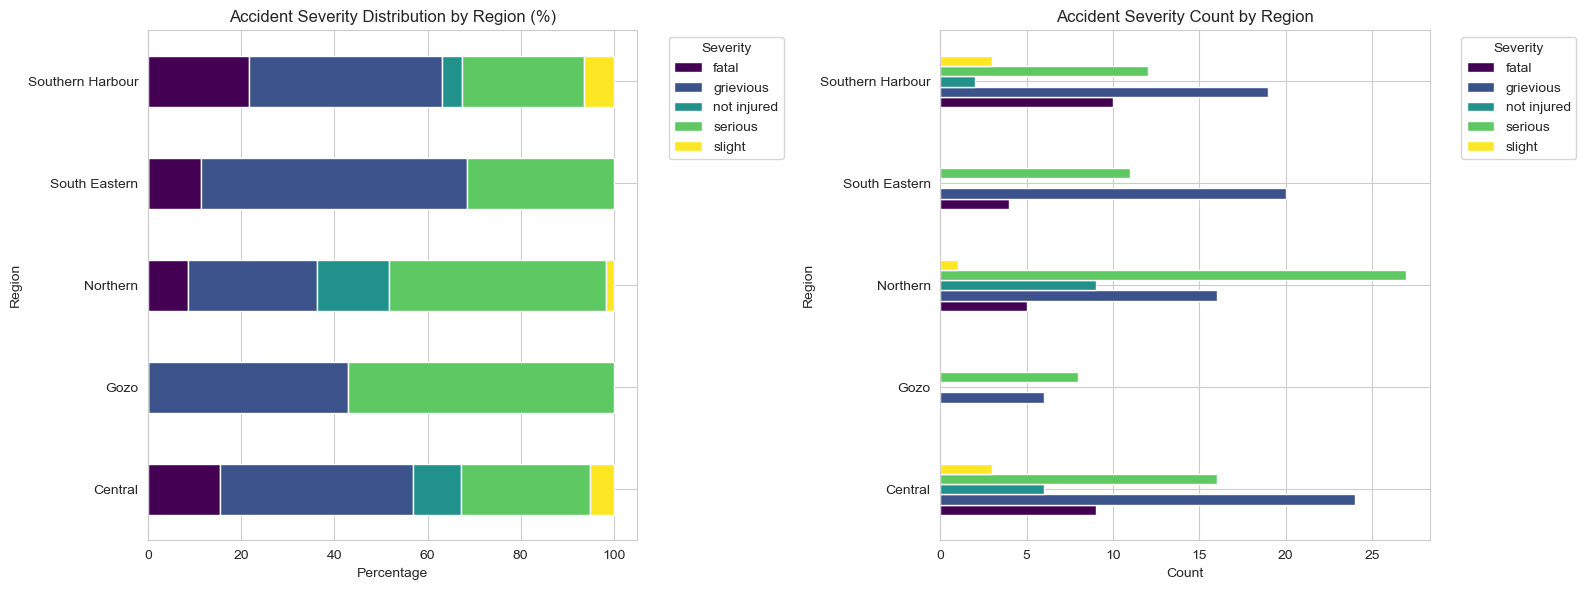


REGION ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS

Central:
  Total accidents: 58 (27.49% of all accidents)
  Severity distribution:
    fatal: 15.52%
    grievious: 41.38%
    not injured: 10.34%
    serious: 27.59%
    slight: 5.17%

Gozo:
  Total accidents: 14 (6.64% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 42.86%
    not injured: 0.00%
    serious: 57.14%
    slight: 0.00%

Northern:
  Total accidents: 58 (27.49% of all accidents)
  Severity distribution:
    fatal: 8.62%
    grievious: 27.59%
    not injured: 15.52%
    serious: 46.55%
    slight: 1.72%

South Eastern:
  Total accidents: 35 (16.59% of all accidents)
  Severity distribution:
    fatal: 11.43%
    grievious: 57.14%
    not injured: 0.00%
    serious: 31.43%
    slight: 0.00%

Southern Harbour:
  Total accidents: 46 (21.80% of all accidents)
  Severity distribution:
    fatal: 21.74%
    grievious: 41.30%
    not injured: 4.35%
    serious: 26.09%
    slight: 6.52%


In [185]:
# Severity vs Region
severity_region = pd.crosstab(df['region'], df['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_region.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution by Region (%)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Region')
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_region_counts = pd.crosstab(df['region'], df['accident_severity'])
severity_region_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count by Region')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Region')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("REGION ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS")
print("="*80)
region_counts = df['region'].value_counts()
for region in severity_region.index:
    count = region_counts[region]
    pct = count / len(df) * 100
    print(f"\n{region}:")
    print(f"  Total accidents: {count} ({pct:.2f}% of all accidents)")
    print(f"  Severity distribution:")
    for severity in severity_region.columns:
        sev_pct = severity_region.loc[region, severity]
        print(f"    {severity}: {sev_pct:.2f}%")

### 15.10 Severity vs Rain Conditions

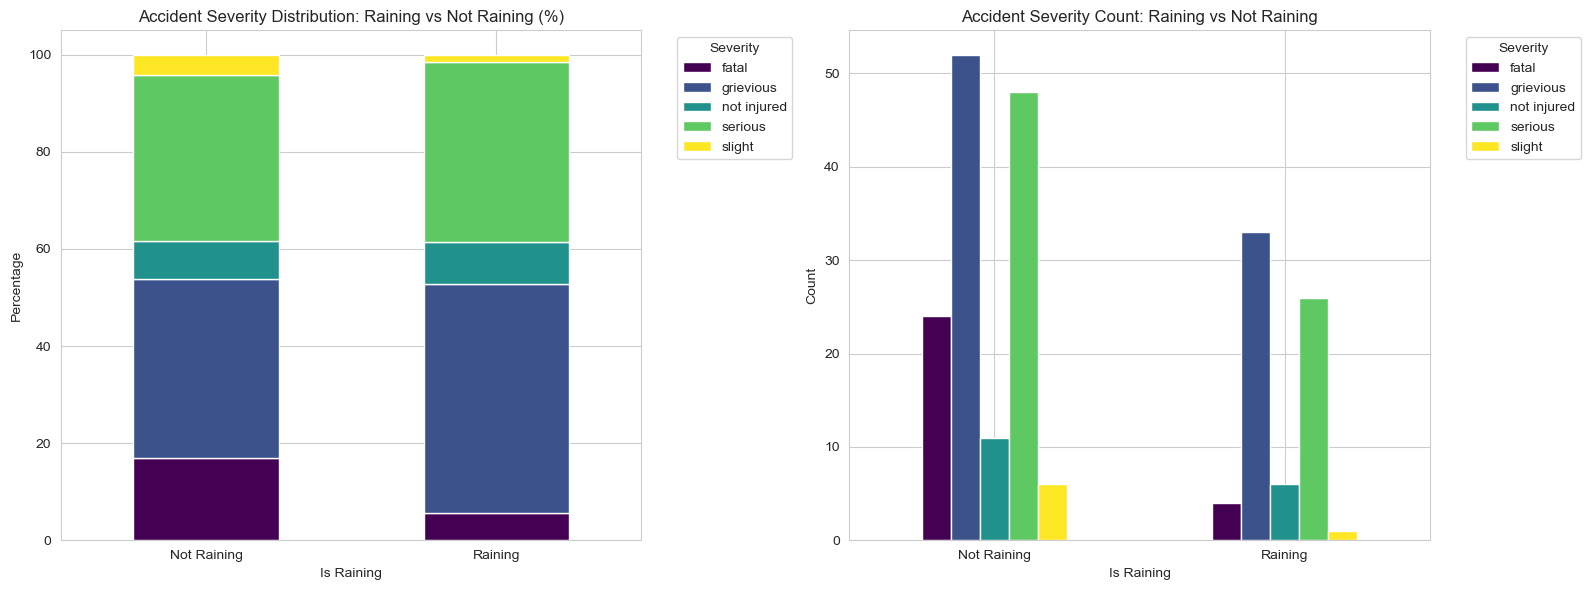


Severity Distribution: Raining vs Not Raining (%):
accident_severity  fatal  grievious  not injured  serious  slight
Not Raining        17.02      36.88         7.80    34.04    4.26
Raining             5.71      47.14         8.57    37.14    1.43


In [186]:
# Severity vs Rain Conditions
severity_rain = pd.crosstab(df['is_raining'], df['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_rain.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution: Raining vs Not Raining (%)')
axes[0].set_xlabel('Is Raining')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(['Not Raining', 'Raining'], rotation=0)
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_rain_counts = pd.crosstab(df['is_raining'], df['accident_severity'])
severity_rain_counts.plot(kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count: Raining vs Not Raining')
axes[1].set_xlabel('Is Raining')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Not Raining', 'Raining'], rotation=0)
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\nSeverity Distribution: Raining vs Not Raining (%):")
severity_rain.index = ['Not Raining', 'Raining']
print(severity_rain.round(2))

### 15.11 Severity vs Traffic Level

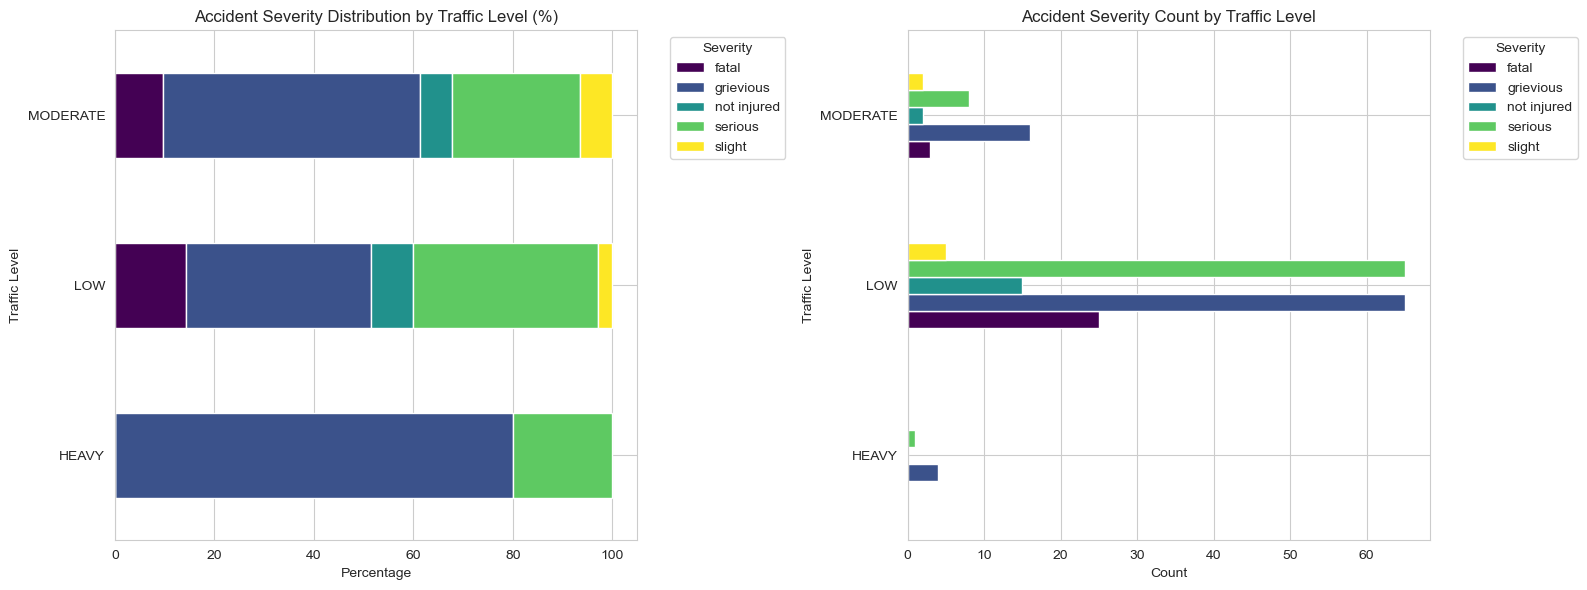


TRAFFIC LEVEL ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS

HEAVY:
  Total accidents: 5 (2.37% of all accidents)
  Severity distribution:
    fatal: 0.00%
    grievious: 80.00%
    not injured: 0.00%
    serious: 20.00%
    slight: 0.00%

LOW:
  Total accidents: 175 (82.94% of all accidents)
  Severity distribution:
    fatal: 14.29%
    grievious: 37.14%
    not injured: 8.57%
    serious: 37.14%
    slight: 2.86%

MODERATE:
  Total accidents: 31 (14.69% of all accidents)
  Severity distribution:
    fatal: 9.68%
    grievious: 51.61%
    not injured: 6.45%
    serious: 25.81%
    slight: 6.45%


In [187]:
# Severity vs Traffic Level
severity_traffic = pd.crosstab(df['traffic_level'], df['accident_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
severity_traffic.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Accident Severity Distribution by Traffic Level (%)')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('Traffic Level')
axes[0].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

# Count plot
severity_traffic_counts = pd.crosstab(df['traffic_level'], df['accident_severity'])
severity_traffic_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Accident Severity Count by Traffic Level')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Traffic Level')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TRAFFIC LEVEL ANALYSIS - WEIGHTED BY NUMBER OF ACCIDENTS")
print("="*80)
traffic_level_counts = df['traffic_level'].value_counts()
for traffic_level in severity_traffic.index:
    count = traffic_level_counts[traffic_level]
    pct = count / len(df) * 100
    print(f"\n{traffic_level}:")
    print(f"  Total accidents: {count} ({pct:.2f}% of all accidents)")
    print(f"  Severity distribution:")
    for severity in severity_traffic.columns:
        sev_pct = severity_traffic.loc[traffic_level, severity]
        print(f"    {severity}: {sev_pct:.2f}%")

## 16. Statistical Tests for Significance

This section performs statistical tests to determine if there is a statistically significant association between accident severity and various features analyzed in Section 15.

**Why Chi-Square and ANOVA?**
- **Chi-Square Test**: Used for categorical variables (e.g., time category, city, street type) to test if the distribution of accident severity differs significantly across categories.
- **ANOVA (Analysis of Variance)**: Used for continuous variables (e.g., number of drivers, total injured) to test if the mean values differ significantly across severity levels.

Both tests use α = 0.05 as the significance threshold.

In [188]:
from scipy.stats import chi2_contingency

# Function to perform and display chi-square test results
def perform_chi_square_test(contingency_table, feature_name):
    """
    Performs chi-square test and displays results
    
    Parameters:
    contingency_table: pd.DataFrame - crosstab of feature vs severity
    feature_name: str - name of the feature being tested
    """
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print("="*80)
    print(f"Chi-Square Test: {feature_name} vs Accident Severity")
    print("="*80)
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-Value: {p_value:.6f}")
    print(f"\nSignificance Level: α = 0.05")
    
    if p_value < 0.001:
        print(f"Result: HIGHLY SIGNIFICANT (p < 0.001) ***")
        print(f"Interpretation: There is extremely strong evidence of an association between {feature_name} and accident severity.")
    elif p_value < 0.01:
        print(f"Result: VERY SIGNIFICANT (p < 0.01) **")
        print(f"Interpretation: There is very strong evidence of an association between {feature_name} and accident severity.")
    elif p_value < 0.05:
        print(f"Result: SIGNIFICANT (p < 0.05) *")
        print(f"Interpretation: There is significant evidence of an association between {feature_name} and accident severity.")
    else:
        print(f"Result: NOT SIGNIFICANT (p >= 0.05)")
        print(f"Interpretation: There is insufficient evidence to conclude an association between {feature_name} and accident severity.")
    
    print("\n")
    return chi2, p_value, dof

# Store results
chi_square_results = []

### 16.1 Time Category vs Severity

In [189]:
# Chi-Square Test: Time Category vs Severity
time_severity_table = pd.crosstab(df['accident_time_category'], df['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(time_severity_table, "Time Category")
chi_square_results.append({
    'Feature': 'Time Category',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Time Category vs Accident Severity
Chi-Square Statistic: 48.5938
Degrees of Freedom: 20
P-Value: 0.000351

Significance Level: α = 0.05
Result: HIGHLY SIGNIFICANT (p < 0.001) ***
Interpretation: There is extremely strong evidence of an association between Time Category and accident severity.




### 16.2 City (Top 10) vs Severity

In [190]:
# Chi-Square Test: City (Top 10) vs Severity
city_severity_table = pd.crosstab(df_top_cities['city'], df_top_cities['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(city_severity_table, "City (Top 10)")
chi_square_results.append({
    'Feature': 'City (Top 10)',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: City (Top 10) vs Accident Severity
Chi-Square Statistic: 58.5663
Degrees of Freedom: 36
P-Value: 0.010121

Significance Level: α = 0.05
Result: SIGNIFICANT (p < 0.05) *
Interpretation: There is significant evidence of an association between City (Top 10) and accident severity.




### 16.3 Street Type vs Severity

In [191]:
# Chi-Square Test: Street Type vs Severity
street_severity_table = pd.crosstab(df['street_type'], df['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(street_severity_table, "Street Type")
chi_square_results.append({
    'Feature': 'Street Type',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Street Type vs Accident Severity
Chi-Square Statistic: 31.7045
Degrees of Freedom: 20
P-Value: 0.046550

Significance Level: α = 0.05
Result: SIGNIFICANT (p < 0.05) *
Interpretation: There is significant evidence of an association between Street Type and accident severity.




### 16.4 Region vs Severity

In [192]:
# Chi-Square Test: Region vs Severity
region_severity_table = pd.crosstab(df['region'], df['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(region_severity_table, "Region")
chi_square_results.append({
    'Feature': 'Region',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Region vs Accident Severity
Chi-Square Statistic: 29.8954
Degrees of Freedom: 16
P-Value: 0.018552

Significance Level: α = 0.05
Result: SIGNIFICANT (p < 0.05) *
Interpretation: There is significant evidence of an association between Region and accident severity.




### 16.5 Rain Conditions vs Severity

In [193]:
# Chi-Square Test: Rain Conditions vs Severity
rain_severity_table = pd.crosstab(df['is_raining'], df['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(rain_severity_table, "Rain Conditions")
chi_square_results.append({
    'Feature': 'Rain Conditions',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Rain Conditions vs Accident Severity
Chi-Square Statistic: 7.0191
Degrees of Freedom: 4
P-Value: 0.134883

Significance Level: α = 0.05
Result: NOT SIGNIFICANT (p >= 0.05)
Interpretation: There is insufficient evidence to conclude an association between Rain Conditions and accident severity.




### 16.6 Traffic Level vs Severity

In [194]:
# Chi-Square Test: Traffic Level vs Severity
traffic_severity_table = pd.crosstab(df['traffic_level'], df['accident_severity'])
chi2, p_value, dof = perform_chi_square_test(traffic_severity_table, "Traffic Level")
chi_square_results.append({
    'Feature': 'Traffic Level',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Traffic Level vs Accident Severity
Chi-Square Statistic: 7.5268
Degrees of Freedom: 8
P-Value: 0.480998

Significance Level: α = 0.05
Result: NOT SIGNIFICANT (p >= 0.05)
Interpretation: There is insufficient evidence to conclude an association between Traffic Level and accident severity.




### 16.7 Driver Age Brackets vs Severity

In [195]:
# Chi-Square Test: Driver Age Brackets vs Severity
# Create a long-form dataset for age brackets
severity_age_data = []
for idx, row in df.iterrows():
    severity = row['accident_severity']
    for col, label in zip(age_bracket_cols, ['Under 18', '18-24', '25-49', '50-64', '65+', 'Unknown']):
        count = int(row[col])
        for _ in range(count):
            severity_age_data.append({'Severity': severity, 'Age_Bracket': label})

df_age_long = pd.DataFrame(severity_age_data)
age_severity_table = pd.crosstab(df_age_long['Age_Bracket'], df_age_long['Severity'])
chi2, p_value, dof = perform_chi_square_test(age_severity_table, "Driver Age Brackets")
chi_square_results.append({
    'Feature': 'Driver Age Brackets',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Driver Age Brackets vs Accident Severity
Chi-Square Statistic: 141.6854
Degrees of Freedom: 20
P-Value: 0.000000

Significance Level: α = 0.05
Result: HIGHLY SIGNIFICANT (p < 0.001) ***
Interpretation: There is extremely strong evidence of an association between Driver Age Brackets and accident severity.




### 16.8 Driver Gender vs Severity

In [196]:
# Chi-Square Test: Driver Gender vs Severity
# Create a long-form dataset for gender
severity_gender_data = []
for idx, row in df.iterrows():
    severity = row['accident_severity']
    for col, label in zip(gender_cols, ['Male', 'Female', 'Unknown']):
        count = int(row[col])
        for _ in range(count):
            severity_gender_data.append({'Severity': severity, 'Gender': label})

df_gender_long = pd.DataFrame(severity_gender_data)
gender_severity_table = pd.crosstab(df_gender_long['Gender'], df_gender_long['Severity'])
chi2, p_value, dof = perform_chi_square_test(gender_severity_table, "Driver Gender")
chi_square_results.append({
    'Feature': 'Driver Gender',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Driver Gender vs Accident Severity
Chi-Square Statistic: 55.4187
Degrees of Freedom: 8
P-Value: 0.000000

Significance Level: α = 0.05
Result: HIGHLY SIGNIFICANT (p < 0.001) ***
Interpretation: There is extremely strong evidence of an association between Driver Gender and accident severity.




### 16.9 Vehicle Types vs Severity

In [197]:
# Chi-Square Test: Vehicle Types vs Severity
# Create a long-form dataset for vehicle types
severity_vehicle_data = []
for idx, row in df.iterrows():
    severity = row['accident_severity']
    for col, label in zip(vehicle_cols, ['Unknown', 'Pedestrian', 'Bicycle', 'Motorbike', 'Car', 'Van', 'Bus']):
        count = int(row[col])
        for _ in range(count):
            severity_vehicle_data.append({'Severity': severity, 'Vehicle_Type': label})

df_vehicle_long = pd.DataFrame(severity_vehicle_data)
vehicle_severity_table = pd.crosstab(df_vehicle_long['Vehicle_Type'], df_vehicle_long['Severity'])
chi2, p_value, dof = perform_chi_square_test(vehicle_severity_table, "Vehicle Types")
chi_square_results.append({
    'Feature': 'Vehicle Types',
    'Chi-Square': chi2,
    'P-Value': p_value,
    'DOF': dof,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
})

Chi-Square Test: Vehicle Types vs Accident Severity
Chi-Square Statistic: 33.8436
Degrees of Freedom: 24
P-Value: 0.087487

Significance Level: α = 0.05
Result: NOT SIGNIFICANT (p >= 0.05)
Interpretation: There is insufficient evidence to conclude an association between Vehicle Types and accident severity.




### 16.10 ANOVA Test: Number of Drivers vs Severity

In [198]:
from scipy.stats import f_oneway

# ANOVA Test: Number of Drivers vs Severity
# Get groups using groupby - automatically handles all severity levels
groups = [group['num_drivers_total'].dropna() for name, group in df.groupby('accident_severity') 
          if len(group['num_drivers_total'].dropna()) > 0]

if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)
    
    print("="*80)
    print("ANOVA Test: Number of Drivers vs Accident Severity")
    print("="*80)
    print(f"F-Statistic: {f_stat:.4f}")
    print(f"P-Value: {p_value:.6f}")
    print(f"Degrees of Freedom: {len(groups) - 1}")
    
    if p_value < 0.001:
        print(f"Result: HIGHLY SIGNIFICANT (p < 0.001) ***")
    elif p_value < 0.01:
        print(f"Result: VERY SIGNIFICANT (p < 0.01) **")
    elif p_value < 0.05:
        print(f"Result: SIGNIFICANT (p < 0.05) *")
    else:
        print(f"Result: NOT SIGNIFICANT (p >= 0.05)")
    print("="*80)
    
    chi_square_results.append({
        'Feature': 'Number of Drivers (ANOVA)',
        'Chi-Square': f_stat,
        'P-Value': p_value,
        'DOF': len(groups) - 1,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
else:
    print("ERROR: Cannot perform ANOVA - need at least 2 groups with data")

ANOVA Test: Number of Drivers vs Accident Severity
F-Statistic: 1.5526
P-Value: 0.188344
Degrees of Freedom: 4
Result: NOT SIGNIFICANT (p >= 0.05)


### 16.11 ANOVA Test: Total Injured vs Severity

In [199]:
# ANOVA Test: Total Injured vs Severity
# Get groups using groupby - automatically handles all severity levels
groups = [group['total_injured'].dropna() for name, group in df.groupby('accident_severity') 
          if len(group['total_injured'].dropna()) > 0]

if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)
    
    print("="*80)
    print("ANOVA Test: Total Injured vs Accident Severity")
    print("="*80)
    print(f"F-Statistic: {f_stat:.4f}")
    print(f"P-Value: {p_value:.6f}")
    print(f"Degrees of Freedom: {len(groups) - 1}")
    
    if p_value < 0.001:
        print(f"Result: HIGHLY SIGNIFICANT (p < 0.001) ***")
    elif p_value < 0.01:
        print(f"Result: VERY SIGNIFICANT (p < 0.01) **")
    elif p_value < 0.05:
        print(f"Result: SIGNIFICANT (p < 0.05) *")
    else:
        print(f"Result: NOT SIGNIFICANT (p >= 0.05)")
    print("="*80)
    
    chi_square_results.append({
        'Feature': 'Total Injured (ANOVA)',
        'Chi-Square': f_stat,
        'P-Value': p_value,
        'DOF': len(groups) - 1,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
else:
    print("ERROR: Cannot perform ANOVA - need at least 2 groups with data")

ANOVA Test: Total Injured vs Accident Severity
F-Statistic: 6.2661
P-Value: 0.000089
Degrees of Freedom: 4
Result: HIGHLY SIGNIFICANT (p < 0.001) ***


### 16.12 Summary of All Statistical Tests

SUMMARY OF ALL STATISTICAL TESTS (CHI-SQUARE & ANOVA)

All tests sorted by P-Value (most significant first):

                  Feature  Chi-Square      P-Value  DOF Significant
      Driver Age Brackets  141.685362 2.422858e-20   20         Yes
            Driver Gender   55.418702 3.660287e-09    8         Yes
    Total Injured (ANOVA)    6.266091 8.896461e-05    4         Yes
            Time Category   48.593783 3.509401e-04   20         Yes
            City (Top 10)   58.566270 1.012143e-02   36         Yes
                   Region   29.895422 1.855207e-02   16         Yes
              Street Type   31.704539 4.655015e-02   20         Yes
            Vehicle Types   33.843621 8.748690e-02   24          No
          Rain Conditions    7.019089 1.348829e-01    4          No
Number of Drivers (ANOVA)    1.552628 1.883441e-01    4          No
            Traffic Level    7.526830 4.809983e-01    8          No

Total Tests Performed: 11
  - Chi-Square Tests: 9
  - ANOVA Tests: 2

Sig

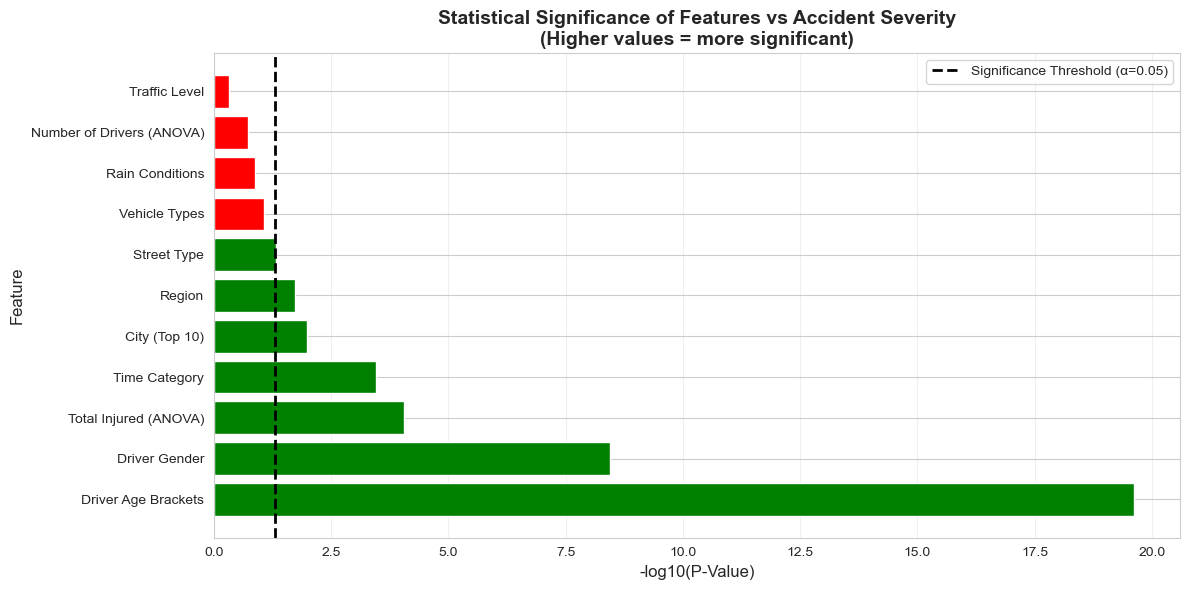


Interpretation:
- Green bars: Statistically significant association with accident severity (p < 0.05)
- Red bars: No significant association (p >= 0.05)
- The higher the bar, the stronger the statistical evidence of association

Note: Chi-Square tests assess categorical associations, while ANOVA tests assess
      whether continuous variables (number of drivers, total injured) differ across severity levels.


In [200]:
# Create summary dataframe
results_df = pd.DataFrame(chi_square_results)
results_df = results_df.sort_values('P-Value')

print("="*80)
print("SUMMARY OF ALL STATISTICAL TESTS (CHI-SQUARE & ANOVA)")
print("="*80)
print("\nAll tests sorted by P-Value (most significant first):\n")
print(results_df.to_string(index=False))

# Count significant results by test type
chi_square_tests = results_df[~results_df['Feature'].str.contains('ANOVA')]
anova_tests = results_df[results_df['Feature'].str.contains('ANOVA')]

num_significant = results_df[results_df['Significant'] == 'Yes'].shape[0]
total_tests = results_df.shape[0]

print("\n" + "="*80)
print(f"Total Tests Performed: {total_tests}")
print(f"  - Chi-Square Tests: {len(chi_square_tests)}")
print(f"  - ANOVA Tests: {len(anova_tests)}")
print(f"\nSignificant Results (p < 0.05): {num_significant}")
print(f"  - Chi-Square: {chi_square_tests[chi_square_tests['Significant'] == 'Yes'].shape[0]} out of {len(chi_square_tests)}")
print(f"  - ANOVA: {anova_tests[anova_tests['Significant'] == 'Yes'].shape[0]} out of {len(anova_tests)}")
print(f"\nNon-Significant Results: {total_tests - num_significant}")
print("="*80)

# Visualize p-values
plt.figure(figsize=(12, 6))
plt.barh(results_df['Feature'], -np.log10(results_df['P-Value']), 
         color=['green' if sig == 'Yes' else 'red' for sig in results_df['Significant']])
plt.axvline(x=-np.log10(0.05), color='black', linestyle='--', linewidth=2, label='Significance Threshold (α=0.05)')
plt.xlabel('-log10(P-Value)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Statistical Significance of Features vs Accident Severity\n(Higher values = more significant)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Green bars: Statistically significant association with accident severity (p < 0.05)")
print("- Red bars: No significant association (p >= 0.05)")
print("- The higher the bar, the stronger the statistical evidence of association")
print("\nNote: Chi-Square tests assess categorical associations, while ANOVA tests assess")
print("      whether continuous variables (number of drivers, total injured) differ across severity levels.")